# Laurentia Paleomagnetic Poles compilation

This Jupyter notebook develops a compilation of paleomagnetic poles for Laurentia. It is associated with the manuscript:

**The Precambrian paleogeography of Laurentia** written by Nicholas L. Swanson-Hysell for a book entitled *Ancient Supercontinents and the Paleogeography of the Earth*

 This notebook uses a Python 3 kernel called `laurentia_paleogeography` which has a set of packages defined in a .yml file within this repository. 

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib import gridspec

import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from cartopy.feature import NaturalEarthFeature, COLORS
import numpy as np
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag

duluth_lat = 46.8
duluth_lon = 267.9

# Import poles

## Import Leirubakki compilation

This analysis will focus on the poles rated as 'A' or 'B' by the Nordic Paleogeography working groups. The most recent update to the Laurentia compiliation was made at the 2017 workshop in Leirubakki, Iceland.

In [2]:
Leirubakki_poles = pd.read_excel('../Data/Leirubakki_Laurentia.xlsx')
Leirubakki_poles.columns

Index([                      'Terrane',                      'ROCKNAME',
                                 -10.3,                     'COMPONENT',
                               'TESTS',                          'TILT',
                                'SLAT',                         'SLONG',
                                   'B',                             'N',
                                 'DEC',                           'INC',
                              'abs(I)',                            'KD',
                                'ED95',                          'PLAT',
                               'PLONG',                            'DP',
                                  'DM',                           'A95',
                                   'f',                          'INCf',
                               'PLATf',                         'PLONf',
                                 'DPf',                           'DMf',
                                'A95f',            

## Assign Plate_ID to each pole

A Plate ID is assigned to each pole largely following the scheme of Evans and Eglington.

In [3]:
Leirubakki_poles.Terrane.unique()

array(['Laurentia-Wyoming', 'Laurentia-Superior(East)', 'Laurentia-Slave',
       'Laurentia-Superior(West)', 'Laurentia-Greenland-Nain',
       'Laurentia-Rae', 'Laurentia-Superior',
       'Laurentia-Trans-Hudson orogen', 'Laurentia',
       'Laurentia-Greenland', 'Laurentia-Scotland', 'Laurentia-Svalbard'],
      dtype=object)

In [4]:
Leirubakki_poles['Plate_ID'] = pd.Series(dtype=str)

for pole in Leirubakki_poles.index:
    if Leirubakki_poles['Terrane'][pole] == 'Laurentia-Superior(East)':
        Leirubakki_poles['Plate_ID'][pole] = 10043
    if Leirubakki_poles['Terrane'][pole] == 'Laurentia-Superior(West)':
        Leirubakki_poles['Plate_ID'][pole] = 10023
    if Leirubakki_poles['Terrane'][pole] == 'Laurentia-Superior':
        Leirubakki_poles['Plate_ID'][pole] = 10023
    if Leirubakki_poles['Terrane'][pole] == 'Laurentia-Wyoming':
        Leirubakki_poles['Plate_ID'][pole] = 10049
    if Leirubakki_poles['Terrane'][pole] == 'Laurentia-Trans-Hudson orogen':
        Leirubakki_poles['Plate_ID'][pole] = 1000
    if Leirubakki_poles['Terrane'][pole] == 'Laurentia-Rae':
        Leirubakki_poles['Plate_ID'][pole] = 10640
    if Leirubakki_poles['Terrane'][pole] == 'Laurentia-Slave':
        Leirubakki_poles['Plate_ID'][pole] = 10041
    if Leirubakki_poles['Terrane'][pole] == 'Laurentia-Greenland':
        Leirubakki_poles['Plate_ID'][pole] = 10032
    if Leirubakki_poles['Terrane'][pole] == 'Laurentia-Greenland-Nain':
        Leirubakki_poles['Plate_ID'][pole] = 10032
    if Leirubakki_poles['Terrane'][pole] == 'Laurentia':
        Leirubakki_poles['Plate_ID'][pole] = 1000
    if Leirubakki_poles['Terrane'][pole] == 'Laurentia-Scotland':
        Leirubakki_poles['Plate_ID'][pole] = 10258
    if Leirubakki_poles['Terrane'][pole] == 'Laurentia-Svalbard':
        Leirubakki_poles['Plate_ID'][pole] = 10296

In [5]:
Leirubakki_poles.head()

,Terrane,ROCKNAME,-10.3,COMPONENT,TESTS,TILT,SLAT,SLONG,B,N,DEC,INC,abs(I),KD,ED95,PLAT,PLONG,DP,DM,A95,f,INCf,PLATf,PLONf,DPf,DMf,A95f,%REV,DEMAGCODE,40,24,10,16,2,3,4,5,6,7,Q(7),Grade,nominal age,lomagage,himagage,REF/method,ROCKNAME.1,POLE AUTHORS,YEAR,JOURNAL,VOLUME,VPAGES,TITLE,Overlap_Comment,Pole_citation_code,Geochron_citation_code,Notes_Changes_from_Leirubakki,Plate_ID
0,Laurentia-Wyoming,Stillwater Complex - C2,new,NaN,NaN,NaN,45.2,249.200000,NaN,74.0,171.0,-63.0,63.0,32.0,2.9,-83.6,335.8,3.583959,4.559272,4.042307,1.0,-63.0,-83.6,335.8,3.6,4.6,4.069398,100,4.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,4.0,A,2705.0,2701.0,2709.0,"2705±4, new",Stillwater Complex - C2,"Selkin, P.A., Gee, J.S., Meurer, W.P., Hemming...",2008.0,G-cubed,9,23pp,Paleointensity record from the 2.7 Ga Stillwat...,Corresponds to Cenozoic/Present Local Field,\cite{Selkin2008a},NaN,NaN,10049
1,Laurentia-Superior(East),Otto Stock dikes and aureole,2629,N+R Component,"C*+,R-",0.0,48.0,279.900002,18.0,84.0,330.0,71.0,71.0,139.0,3.0,69.0,227.0,4.500000,5.200000,4.837355,1.0,71.0,69.0,227.0,4.5,5.2,4.837355,17or83,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,6.0,B,2676.0,2671.0,2681.0,"2680±1 for stock, but lamprophyre dykes are yo...",Otto Stock Dykes and Aureole,"Pullaiah,G., Irving,E.",1975.0,Canad.J.Earth Sci.,12,1609-1618,Paleomagnetism of the contact aureole and late...,Overlaps with Cenozoic,\cite{Pullaiah1975b},NaN,NaN,10043
2,Laurentia-Slave,Defeat Suite,new,NaN,C*+,0.0,62.5,245.500000,5.0,58.0,2.0,-47.0,47.0,30.0,14.0,-1.0,64.0,15.000000,15.000000,15.000000,1.0,-47.0,-1.0,64.0,15.0,15.0,15.000000,0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,5.0,B,2625.0,2620.0,2630.0,"2625, U-Pb: 2628 pm 3, 2624 pm4",Defeat Suite,"Mitchell, R.N., Bleeker, W., Van Breemen, O., ...",2014.0,Am. J. Sci.,314,878-894,Plate tectonics before 2.0 Ga: Evidence from p...,NaN,\cite{Mitchell2014a},\cite{Davis1999a},NaN,10041
3,Laurentia-Superior(East),Ptarmigan-Mistassini dikes,new,NaN,NaN,0.0,54.0,287.000000,3.0,18.0,49.6,46.1,46.1,0.1,1000.0,-45.3,213.0,13.800000,13.800000,13.800000,1.0,46.1,-45.3,213.0,13.8,13.8,13.800000,0or100,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,4.0,B,2505.0,2503.0,2507.0,"2505±2,",PTARMIGAN MEAN,"Evans,D.A.D., Halls,H.C.",2010.0,Precambrian Res.,183,474-489,Restoring Proterozoic deformation within the S...,NaN,\cite{Evans2010a},NaN,NaN,10043
4,Laurentia-Superior(East),Matachewan dikes R,new,NaN,C+,0.0,48.0,278.000000,NaN,1000.0,207.6,-16.6,16.6,1000.0,0.1,-44.1,238.3,1.600000,1.600000,1.600000,1.0,-16.6,-44.1,238.3,1.6,1.6,1.600000,0or100,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,6.0,A,2466.0,2443.0,2489.0,"two ages, both U-Pb(z)",MATACHEWAN R,"Evans,D.A.D., Halls,H.C.",2010.0,Precambrian Res.,183,474-489,Restoring Proterozoic deformation within the S...,NaN,\cite{Evans2010a},NaN,NaN,10043


In [6]:
Leirubakki_poles.to_csv('../Data/Leirubakki_poles_w_PlateID.csv')

## Apply Euler rotations to poles from seperated terranes

The poles in the compilation are given relative to their local block. There are terranes with valuable constraints that were once part of Laurentia, but have since had distinct drift histories. We can apply Euler rotations associated with these separation in an effort to utilize these poles in reconstructing Laurentia's history. We use the following Euler poles:

\begin{table}[hbt]
\begin{tabular}{|l|l|l|l|p{2 in}|}
  \hline
& Euler pole & Euler pole & rotation & note and \\
Block & longitude & latitude & angle & citation \\
\hline
Greenland & -118.5 & 67.5 & -13.8 & Cenozoic separation of Greenland from Laurentia associated with opening of Baffin Bay and the Labrador Sea \citep{Roest1989} \\
\hline
Scotland & 161.9 & 78.6 & -31.0 & Reconstructing Atlantic opening following \cite{Torsvik2017a} \\
\hline
Svalbard & 125.0 & -81.0 & 68 & Rotate Svalbard to Laurentia in fit that works well with East Greenland basin according to \cite{Maloof2006a}\\
\hline
\end{tabular}
\caption{}
\end{table}

In [7]:
Greenland_Euler = [67.5,-118.5,-13.8] #[lat,lon,CCW angle]
Scotland_Euler = [78.6,161.9,-31.0]
Svalbard_Euler = [-81.0,125.0,68.0]

Let's make sure that the rotations are working as expected by:
- rotating Edinburgh (55.9533° N, 3.1883° W) back to Laurentia.
- Nuuk (64.1814° N, 51.6941° W) back to Laurentia
- Longyearbyen (78.2232° N, 15.6267° E) back to Laurentia

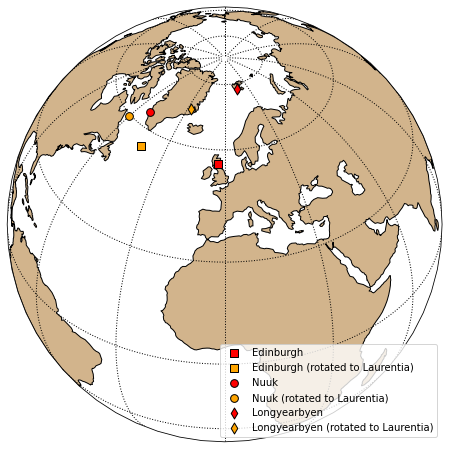

In [8]:
Edinburgh_lat = 55.95
Edinburgh_lon = -3.19
Edinburgh_recon = pmag.pt_rot(Scotland_Euler,[Edinburgh_lat],[Edinburgh_lon])
Edinburgh_recon_lat = Edinburgh_recon[0][0]
Edinburgh_recon_lon = Edinburgh_recon[1][0]

Nuuk_lat = 64.1814
Nuuk_lon = -51.6941
Nuuk_recon = pmag.pt_rot(Greenland_Euler,[Nuuk_lat],[Nuuk_lon])
Nuuk_recon_lat = Nuuk_recon[0][0]
Nuuk_recon_lon = Nuuk_recon[1][0]

Longyearbyen_lat = 78.2232
Longyearbyen_lon = 15.6267
Longyearbyen_recon = pmag.pt_rot(Svalbard_Euler,[Longyearbyen_lat],[Longyearbyen_lon])
Longyearbyen_recon_lat = Longyearbyen_recon[0][0]
Longyearbyen_recon_lon = Longyearbyen_recon[1][0]

m = ipmag.make_orthographic_map(central_latitude=40)
ipmag.plot_vgp(m,Edinburgh_lon,Edinburgh_lat, color='red',markersize=60,marker='s',label='Edinburgh')
ipmag.plot_vgp(m,Edinburgh_recon_lon,Edinburgh_recon_lat, color='orange',markersize=60,marker='s',label='Edinburgh (rotated to Laurentia)')
ipmag.plot_vgp(m,Nuuk_lon,Nuuk_lat, color='red',markersize=60,label='Nuuk')
ipmag.plot_vgp(m,Nuuk_recon_lon,Nuuk_recon_lat, color='orange',markersize=60,label='Nuuk (rotated to Laurentia)')
ipmag.plot_vgp(m,Longyearbyen_lon,Longyearbyen_lat, color='red',markersize=60,marker='d',label='Longyearbyen')
ipmag.plot_vgp(m,Longyearbyen_recon_lon,Longyearbyen_recon_lat, color='orange',markersize=60,marker='d',label='Longyearbyen (rotated to Laurentia)')
plt.legend(loc=4)
plt.show()

Using these Euler poles we can define a pole in Laurentia coordinates. Let's create new columns that have all the poles in Laurentia coordinates: `Laurentia_plon`, `Laurentia_plat`.

In [9]:
Leirubakki_poles['Laurentia_plon'] = pd.Series()
Leirubakki_poles['Laurentia_plat'] = pd.Series()

for pole in Leirubakki_poles.index:
    if Leirubakki_poles['Terrane'][pole] == 'Laurentia-Scotland':
        plat, plon = pmag.pt_rot(Scotland_Euler,[Leirubakki_poles['PLAT'][pole]],[Leirubakki_poles['PLONG'][pole]])
        Leirubakki_poles['Laurentia_plat'][pole] = plat[0]
        Leirubakki_poles['Laurentia_plon'][pole] = plon[0]
    if Leirubakki_poles['Terrane'][pole] == 'Laurentia-Greenland':
        plat, plon = pmag.pt_rot(Greenland_Euler,[Leirubakki_poles['PLAT'][pole]],[Leirubakki_poles['PLONG'][pole]])
        Leirubakki_poles['Laurentia_plat'][pole] = plat[0]
        Leirubakki_poles['Laurentia_plon'][pole] = plon[0]
    if Leirubakki_poles['Terrane'][pole] == 'Laurentia-Greenland-Nain':
        plat, plon = pmag.pt_rot(Greenland_Euler,[Leirubakki_poles['PLAT'][pole]],[Leirubakki_poles['PLONG'][pole]])
        Leirubakki_poles['Laurentia_plat'][pole] = plat[0]
        Leirubakki_poles['Laurentia_plon'][pole] = plon[0]
    if Leirubakki_poles['Terrane'][pole] == 'Laurentia-Svalbard':
        plat, plon = pmag.pt_rot(Svalbard_Euler,[Leirubakki_poles['PLAT'][pole]],[Leirubakki_poles['PLONG'][pole]])
        Leirubakki_poles['Laurentia_plat'][pole] = plat[0]
        Leirubakki_poles['Laurentia_plon'][pole] = plon[0]
    if Leirubakki_poles['Terrane'][pole] == 'Laurentia':
        Leirubakki_poles['Laurentia_plat'][pole] = Leirubakki_poles['PLAT'][pole]
        Leirubakki_poles['Laurentia_plon'][pole] = Leirubakki_poles['PLONG'][pole]
    if Leirubakki_poles['Terrane'][pole] == 'Laurentia-Trans-Hudson orogen':
        Leirubakki_poles['Laurentia_plat'][pole] = Leirubakki_poles['PLAT'][pole]
        Leirubakki_poles['Laurentia_plon'][pole] = Leirubakki_poles['PLONG'][pole]

In [10]:
Leirubakki_poles.head()

,Terrane,ROCKNAME,-10.3,COMPONENT,TESTS,TILT,SLAT,SLONG,B,N,DEC,INC,abs(I),KD,ED95,PLAT,PLONG,DP,DM,A95,f,INCf,PLATf,PLONf,DPf,DMf,A95f,%REV,DEMAGCODE,40,24,10,16,2,3,4,5,6,7,Q(7),Grade,nominal age,lomagage,himagage,REF/method,ROCKNAME.1,POLE AUTHORS,YEAR,JOURNAL,VOLUME,VPAGES,TITLE,Overlap_Comment,Pole_citation_code,Geochron_citation_code,Notes_Changes_from_Leirubakki,Plate_ID,Laurentia_plon,Laurentia_plat
0,Laurentia-Wyoming,Stillwater Complex - C2,new,NaN,NaN,NaN,45.2,249.200000,NaN,74.0,171.0,-63.0,63.0,32.0,2.9,-83.6,335.8,3.583959,4.559272,4.042307,1.0,-63.0,-83.6,335.8,3.6,4.6,4.069398,100,4.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,4.0,A,2705.0,2701.0,2709.0,"2705±4, new",Stillwater Complex - C2,"Selkin, P.A., Gee, J.S., Meurer, W.P., Hemming...",2008.0,G-cubed,9,23pp,Paleointensity record from the 2.7 Ga Stillwat...,Corresponds to Cenozoic/Present Local Field,\cite{Selkin2008a},NaN,NaN,10049,NaN,NaN
1,Laurentia-Superior(East),Otto Stock dikes and aureole,2629,N+R Component,"C*+,R-",0.0,48.0,279.900002,18.0,84.0,330.0,71.0,71.0,139.0,3.0,69.0,227.0,4.500000,5.200000,4.837355,1.0,71.0,69.0,227.0,4.5,5.2,4.837355,17or83,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,6.0,B,2676.0,2671.0,2681.0,"2680±1 for stock, but lamprophyre dykes are yo...",Otto Stock Dykes and Aureole,"Pullaiah,G., Irving,E.",1975.0,Canad.J.Earth Sci.,12,1609-1618,Paleomagnetism of the contact aureole and late...,Overlaps with Cenozoic,\cite{Pullaiah1975b},NaN,NaN,10043,NaN,NaN
2,Laurentia-Slave,Defeat Suite,new,NaN,C*+,0.0,62.5,245.500000,5.0,58.0,2.0,-47.0,47.0,30.0,14.0,-1.0,64.0,15.000000,15.000000,15.000000,1.0,-47.0,-1.0,64.0,15.0,15.0,15.000000,0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,5.0,B,2625.0,2620.0,2630.0,"2625, U-Pb: 2628 pm 3, 2624 pm4",Defeat Suite,"Mitchell, R.N., Bleeker, W., Van Breemen, O., ...",2014.0,Am. J. Sci.,314,878-894,Plate tectonics before 2.0 Ga: Evidence from p...,NaN,\cite{Mitchell2014a},\cite{Davis1999a},NaN,10041,NaN,NaN
3,Laurentia-Superior(East),Ptarmigan-Mistassini dikes,new,NaN,NaN,0.0,54.0,287.000000,3.0,18.0,49.6,46.1,46.1,0.1,1000.0,-45.3,213.0,13.800000,13.800000,13.800000,1.0,46.1,-45.3,213.0,13.8,13.8,13.800000,0or100,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,4.0,B,2505.0,2503.0,2507.0,"2505±2,",PTARMIGAN MEAN,"Evans,D.A.D., Halls,H.C.",2010.0,Precambrian Res.,183,474-489,Restoring Proterozoic deformation within the S...,NaN,\cite{Evans2010a},NaN,NaN,10043,NaN,NaN
4,Laurentia-Superior(East),Matachewan dikes R,new,NaN,C+,0.0,48.0,278.000000,NaN,1000.0,207.6,-16.6,16.6,1000.0,0.1,-44.1,238.3,1.600000,1.600000,1.600000,1.0,-16.6,-44.1,238.3,1.6,1.6,1.600000,0or100,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,6.0,A,2466.0,2443.0,2489.0,"two ages, both U-Pb(z)",MATACHEWAN R,"Evans,D.A.D., Halls,H.C.",2010.0,Precambrian Res.,183,474-489,Restoring Proterozoic deformation within the S...,NaN,\cite{Evans2010a},NaN,NaN,10043,NaN,NaN


## Calculating age uncertainities

For plotting purposes, it is useful to have the age uncertainty expressed as the uncertainty magnitude rather than the low and high age. These numbers are calculated through calculating the difference relative to the nominal age in the cell below. In addition, a new age column is generated that gives the nominal age as well as the + and - associated with that age rounded to the nearest integer (half up rounding is implemented via a function).

In [11]:
Leirubakki_poles['nominal age'][98]

757.0

In [12]:
import math

def round_half_up(n, decimals=0):
    multiplier = 10 ** decimals
    return math.floor(n*multiplier + 0.5) / multiplier

int(round_half_up(Leirubakki_poles['nominal age'][98]))

757

In [13]:
Leirubakki_poles['age_error_high'] = pd.Series()
Leirubakki_poles['age_error_low'] = pd.Series()
Leirubakki_poles['age'] = pd.Series()

for pole in Leirubakki_poles.index:
    pole_age_error_high = Leirubakki_poles['himagage'][pole]-Leirubakki_poles['nominal age'][pole]
    Leirubakki_poles['age_error_high'][pole] = pole_age_error_high
    
    pole_age_error_low = Leirubakki_poles['nominal age'][pole]-Leirubakki_poles['lomagage'][pole]
    Leirubakki_poles['age_error_low'][pole] = pole_age_error_low
    
    Leirubakki_poles['age'][pole] = str(int(round_half_up(Leirubakki_poles['nominal age'][pole])))+'$^{+'+str(int(round_half_up(pole_age_error_high)))+'}$'+'$_{-'+str(int(round_half_up(pole_age_error_low)))+'}$'
    
Leirubakki_poles.head()

,Terrane,ROCKNAME,-10.3,COMPONENT,TESTS,TILT,SLAT,SLONG,B,N,DEC,INC,abs(I),KD,ED95,PLAT,PLONG,DP,DM,A95,f,INCf,PLATf,PLONf,DPf,DMf,A95f,%REV,DEMAGCODE,40,24,10,16,2,3,4,5,6,7,Q(7),Grade,nominal age,lomagage,himagage,REF/method,ROCKNAME.1,POLE AUTHORS,YEAR,JOURNAL,VOLUME,VPAGES,TITLE,Overlap_Comment,Pole_citation_code,Geochron_citation_code,Notes_Changes_from_Leirubakki,Plate_ID,Laurentia_plon,Laurentia_plat,age_error_high,age_error_low,age
0,Laurentia-Wyoming,Stillwater Complex - C2,new,NaN,NaN,NaN,45.2,249.200000,NaN,74.0,171.0,-63.0,63.0,32.0,2.9,-83.6,335.8,3.583959,4.559272,4.042307,1.0,-63.0,-83.6,335.8,3.6,4.6,4.069398,100,4.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,4.0,A,2705.0,2701.0,2709.0,"2705±4, new",Stillwater Complex - C2,"Selkin, P.A., Gee, J.S., Meurer, W.P., Hemming...",2008.0,G-cubed,9,23pp,Paleointensity record from the 2.7 Ga Stillwat...,Corresponds to Cenozoic/Present Local Field,\cite{Selkin2008a},NaN,NaN,10049,NaN,NaN,4.0,4.0,2705$^{+4}$$_{-4}$
1,Laurentia-Superior(East),Otto Stock dikes and aureole,2629,N+R Component,"C*+,R-",0.0,48.0,279.900002,18.0,84.0,330.0,71.0,71.0,139.0,3.0,69.0,227.0,4.500000,5.200000,4.837355,1.0,71.0,69.0,227.0,4.5,5.2,4.837355,17or83,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,6.0,B,2676.0,2671.0,2681.0,"2680±1 for stock, but lamprophyre dykes are yo...",Otto Stock Dykes and Aureole,"Pullaiah,G., Irving,E.",1975.0,Canad.J.Earth Sci.,12,1609-1618,Paleomagnetism of the contact aureole and late...,Overlaps with Cenozoic,\cite{Pullaiah1975b},NaN,NaN,10043,NaN,NaN,5.0,5.0,2676$^{+5}$$_{-5}$
2,Laurentia-Slave,Defeat Suite,new,NaN,C*+,0.0,62.5,245.500000,5.0,58.0,2.0,-47.0,47.0,30.0,14.0,-1.0,64.0,15.000000,15.000000,15.000000,1.0,-47.0,-1.0,64.0,15.0,15.0,15.000000,0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,5.0,B,2625.0,2620.0,2630.0,"2625, U-Pb: 2628 pm 3, 2624 pm4",Defeat Suite,"Mitchell, R.N., Bleeker, W., Van Breemen, O., ...",2014.0,Am. J. Sci.,314,878-894,Plate tectonics before 2.0 Ga: Evidence from p...,NaN,\cite{Mitchell2014a},\cite{Davis1999a},NaN,10041,NaN,NaN,5.0,5.0,2625$^{+5}$$_{-5}$
3,Laurentia-Superior(East),Ptarmigan-Mistassini dikes,new,NaN,NaN,0.0,54.0,287.000000,3.0,18.0,49.6,46.1,46.1,0.1,1000.0,-45.3,213.0,13.800000,13.800000,13.800000,1.0,46.1,-45.3,213.0,13.8,13.8,13.800000,0or100,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,4.0,B,2505.0,2503.0,2507.0,"2505±2,",PTARMIGAN MEAN,"Evans,D.A.D., Halls,H.C.",2010.0,Precambrian Res.,183,474-489,Restoring Proterozoic deformation within the S...,NaN,\cite{Evans2010a},NaN,NaN,10043,NaN,NaN,2.0,2.0,2505$^{+2}$$_{-2}$
4,Laurentia-Superior(East),Matachewan dikes R,new,NaN,C+,0.0,48.0,278.000000,NaN,1000.0,207.6,-16.6,16.6,1000.0,0.1,-44.1,238.3,1.600000,1.600000,1.600000,1.0,-16.6,-44.1,238.3,1.6,1.6,1.600000,0or100,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,6.0,A,2466.0,2443.0,2489.0,"two ages, both U-Pb(z)",MATACHEWAN R,"Evans,D.A.D., Halls,H.C.",2010.0,Precambrian Res.,183,474-489,Restoring Proterozoic deformation within the S...,NaN,\cite{Evans2010a},NaN,NaN,10043,NaN,NaN,23.0,23.0,2466$^{+23}$$_{-23}$


## Calculating paleolatitude

For summary purposes, it will be useful to calculate the paleolatitude for a reference point that is relatively central within Laurentia (Duluth, Minnesota) implied by each of the poles (note that this approach isn't appropriate for cratons other than the West Superior craton prior to Laurentia amalgmation). We can use the ```ipmag.lat_from_pole``` function to do so.

In [14]:
Leirubakki_poles['Duluth_plat'] = pd.Series()

for pole in Leirubakki_poles.index:
    if np.isnan(Leirubakki_poles['Laurentia_plat'][pole]) != True:
        plat = ipmag.lat_from_pole(duluth_lon,duluth_lat,
                                   Leirubakki_poles['Laurentia_plon'][pole],
                                   Leirubakki_poles['Laurentia_plat'][pole])
        Leirubakki_poles['Duluth_plat'][pole] = plat
    elif Leirubakki_poles['Terrane'][pole] == 'Laurentia-Superior(West)':
        plat = ipmag.lat_from_pole(duluth_lon,duluth_lat,Leirubakki_poles.PLONG[pole],Leirubakki_poles.PLAT[pole])
        Leirubakki_poles['Duluth_plat'][pole] = plat

In [15]:
poles_A = Leirubakki_poles[Leirubakki_poles['Grade']=='A']
poles_B = Leirubakki_poles[Leirubakki_poles['Grade']=='B']
poles_NR = Leirubakki_poles[Leirubakki_poles['Grade']=='NR']

## Import paleomagia database poles

Additional poles not in this curated compilation are compiled within the Paleomagia database and are imported below.

In [16]:
paleomagia_all = pd.read_csv('../Data/paleomagia_2_08_2018-10-24.csv',delimiter=';')
paleomagia_Laurentia = pd.read_csv('../Data/list_2019-03-17_01-51.csv')
paleomagia_all.columns

Index(['RES#', 'ROCK', 'ROCKUNIT', 'CNTRY', 'COMP', 'CRAT', 'SLAT', 'SLON',
       'LMA', 'HMA', 'ISOAGE', 'AGEREF', 'AGEREF2', 'MET', 'AGE', 'B', 'N',
       'P', 'R%', 'D', 'I', 'alfa95', 'k', 'PLAT', 'PLON', 'DP', 'DM', 'A95',
       '1', '2', '3', '4', '5', '6', 'PMAGREF', 'COMMENT', 'RECALC'],
      dtype='object')

In [17]:
list_of_cratons = ['Laurentia-Grenville', 'Laurentia-Hearne','Laurentia-Mackenzie',
                   'Laurentia-Nain', 'Laurentia-Rae','Laurentia-Slave',
                   'Laurentia-Superior', 'Laurentia-Transhudson','Laurentia-Wyoming',
                   'Laurentia-Yavapai','Greenland', 'Greenland / Gardar',
                   'Greenland / Nagssugtoqidian','Hearne','Rae','Scotland','Slave',
                   'Superior','Superior-Kapuskasing', 'Superior-east', 'Superior-west',
                   'Svalbard', 'Transhudson','Wyoming']

#Need to filter out poles that are also in Leirubakki_poles
paleomagia_poles = paleomagia_all[paleomagia_all['CRAT'].isin(list_of_cratons)]
paleomagia_poles = paleomagia_poles[paleomagia_poles['AGE'] > 542]
paleomagia_poles.head(2)

,RES#,ROCK,ROCKUNIT,CNTRY,COMP,CRAT,SLAT,SLON,LMA,HMA,ISOAGE,AGEREF,AGEREF2,MET,AGE,B,N,P,R%,D,I,alfa95,k,PLAT,PLON,DP,DM,A95,1,2,3,4,5,6,PMAGREF,COMMENT,RECALC
2,14,s,"Seton formation, Kahochella group",CA,HT,Slave,62.0,247.9,1880,1890,1885 ± 5,Davis and Bleeker (2007),NaN,corr.,1885,19,154,N,0,159.0,46.0,7.0,24.0,2.0,267.0,5.7,8.9,7.2,1,1,1,0,1,0,Irving and McGlynn (1979),Age by correlation with Ghost dykes (ca. 1885 ...,0
3,15,s,"Seton formation, Kahochella group",CA,B,Laurentia-Slave,62.0,247.9,1700,1800,NaN,APWP,NaN,"a, m",1750,14,99,N,0,158.0,68.0,7.0,36.0,25.0,263.0,9.9,11.7,10.8,0,1,1,0,1,0,Irving and McGlynn (1979),Sec. magn. acquired during uplift after deep b...,0


In [18]:
list_of_autochthonous_cratons = ['Laurentia-Grenville', 'Laurentia-Hearne','Laurentia-Mackenzie',
                   'Laurentia-Nain', 'Laurentia-Rae','Laurentia-Slave',
                   'Laurentia-Superior', 'Laurentia-Transhudson','Laurentia-Wyoming',
                   'Laurentia-Yavapai','Hearne','Rae','Slave',
                   'Superior','Superior-Kapuskasing', 'Superior-east', 'Superior-west',
                   'Transhudson','Wyoming']

paleomagia_Laurentia = paleomagia_all[(paleomagia_all['CRAT'].isin(list_of_autochthonous_cratons)) & (paleomagia_all['AGE'] < 1800)]
paleomagia_Laurentia.head()

,RES#,ROCK,ROCKUNIT,CNTRY,COMP,CRAT,SLAT,SLON,LMA,HMA,ISOAGE,AGEREF,AGEREF2,MET,AGE,B,N,P,R%,D,I,alfa95,k,PLAT,PLON,DP,DM,A95,1,2,3,4,5,6,PMAGREF,COMMENT,RECALC
3,15,s,"Seton formation, Kahochella group",CA,B,Laurentia-Slave,62.0,247.9,1700,1800,NaN,APWP,NaN,"a, m",1750,14,99,N,0,158.0,68.0,7.0,36.0,25.0,263.0,9.9,11.7,10.8,0,1,1,0,1,0,Irving and McGlynn (1979),Sec. magn. acquired during uplift after deep b...,0
5,17,s,"Douglas Peninsula formation, Pethei group",CA,LT,Laurentia-Slave,62.8,249.7,1220,1320,NaN,APWP,NaN,"a, m",1270,10,54,N,0,233.0,41.0,4.0,125.0,6.0,202.0,3.0,4.9,3.8,0,1,1,0,1,0,Irving and McGlynn (1979),Sec. magn. probably from the intrusion of Mack...,0
37,117,i,Texas granites -R,US,NaN,Laurentia-Yavapai,39.2,264.2,1327,1351,1339 ± 12,GPMDB 4.6,NaN,g,1339,1,7*,R,100,249.6,49.0,11.3,51.4,4.5,209.9,9.9,14.9,12.1,1,0,1,0,0,0,Kodama (1984),NaN,0
38,118,i,Texas granites -N,US,NaN,Laurentia-Yavapai,38.5,265.0,1355,1367,1361 ± 6,GPMDB 4.6,NaN,g,1361,1,9*,N,0,44.8,-31.9,9.5,24.3,-20.2,219.3,6.0,10.7,8.0,1,0,1,0,0,0,Kodama (1984),NaN,0
40,130,i,Cordova gabbro A -C,CA,A,Laurentia-Grenville,44.5,282.2,850,950,1150-1200,GPMDB 4.6,NaN,"a, d",900,18,49,C,78,294.0,-55.5,5.5,42.0,-10.5,151.0,6.0,8.0,6.9,0,1,1,0,0,1,Dunlop and Stirling (1985),Secondary TRM acquired in brief thermal pulse ...,0


In [19]:
paleomagia_Laurentia['age_error_high'] = pd.Series()
paleomagia_Laurentia['age_error_low'] = pd.Series()

for pole in paleomagia_Laurentia.index:
    pole_age_error_high = paleomagia_Laurentia['HMA'][pole]-paleomagia_Laurentia['AGE'][pole]
    paleomagia_Laurentia['age_error_high'][pole] = pole_age_error_high
    
    pole_age_error_low = paleomagia_Laurentia['AGE'][pole]-paleomagia_Laurentia['LMA'][pole]
    paleomagia_Laurentia['age_error_low'][pole] = pole_age_error_low
    
paleomagia_Laurentia.tail()

,RES#,ROCK,ROCKUNIT,CNTRY,COMP,CRAT,SLAT,SLON,LMA,HMA,ISOAGE,AGEREF,AGEREF2,MET,AGE,B,N,P,R%,D,I,alfa95,k,PLAT,PLON,DP,DM,A95,1,2,3,4,5,6,PMAGREF,COMMENT,RECALC,age_error_high,age_error_low
3584,1000322,s,Uinta Mountain group -R,US,NaN,Laurentia-Wyoming,40.7,250.6,750,850,NaN,APWP,NaN,"a, m",800,4,40,R,100,92.6,-7.7,9.2,101.0,4.5,161.9,4.7,9.3,6.6,0,1,1,0,1,1,Weil et al. (2006),NaN,0,50.0,50.0
3599,1002951,m,Sharbot metamorphics A -R,CA,A,Laurentia-Grenville,44.2,283.3,880,1080,NaN,Brett and Dunlop (2008),NaN,"c, g",980,3,24,R,100,283.0,-49.0,18.0,46.0,-12.0,163.0,15.7,23.8,19.3,0,0,1,0,0,1,Brett and Dunlop (2008),NaN,0,100.0,100.0
3600,1002952,m,Sharbot metamorphics A -C,CA,A,Laurentia-Grenville,44.5,283.4,880,1080,NaN,Brett and Dunlop (2008),NaN,"c, g",980,9,104,C,23,92.5,54.7,10.1,27.0,-22.2,165.3,10.1,14.3,12.0,0,1,1,0,0,1,Brett and Dunlop (2008),NaN,0,100.0,100.0
3601,1003291,m,Mazinaw metamorphics A -R,CA,A,Laurentia-Grenville,45.2,282.1,880,1080,930,Brett and Dunlop (2008),NaN,"c, g",980,5,56,R,100,288.0,-60.7,22.0,13.1,-18.7,146.5,25.6,33.5,29.3,0,0,1,0,0,1,Brett and Dunlop (2008),Recalculated from data in Table 1.,1,100.0,100.0
3602,1003292,m,Mazinaw metamorphics A -C,CA,A,Laurentia-Grenville,44.7,282.6,880,1080,930,Brett and Dunlop (2008),NaN,"c, g",980,9,97,C,58,270.5,-57.4,14.5,13.6,-25.3,161.3,15.5,21.2,18.1,0,1,1,0,0,1,Brett and Dunlop (2008),Recalculated from data in Table 1.,1,100.0,100.0


In [20]:
paleomagia_Laurentia['Duluth_plat'] = pd.Series()

for pole in paleomagia_Laurentia.index:
        plat = ipmag.lat_from_pole(duluth_lon,duluth_lat,
                                   paleomagia_Laurentia['PLON'][pole],
                                   paleomagia_Laurentia['PLAT'][pole])
        paleomagia_Laurentia['Duluth_plat'][pole] = plat

## Export the Leirubakki table for the chapter

After this table is exported, some edits need to be made and saved as pole_table_editted.tex:

```
- replace \$\textasciicircum \{ with $^{
- replace \}\$\$\_\{ with }_{
- replace \}\$ with }$
- replace A\$\_\{95}$ with A$_{95}$
- replace \\ with  \\ \hline
- replace \textbackslash  with \
- replace \{ with {
- replace \} with }
- replace Swanson... with Swanson-Hysell2019a}
```

In [21]:
Laurentia_pole_table = Leirubakki_poles[['Terrane', 'ROCKNAME', 'Grade', 'SLONG', 'SLAT', 'PLONG', 'PLAT', 'A95', 'Duluth_plat', 'nominal age', 'age','Pole_citation_code']].copy()
Laurentia_pole_table.rename(columns={'Terrane' : 'terrane','Grade': 'rating','ROCKNAME': 'unit name', 'SLONG' : 'site lon','SLAT' : 'site lat', 'PLONG' : 'plon', 'PLAT' : 'plat', 'A95': 'A$_{95}$', 'Duluth_plat' : 'Duluth lat', 'Pole_citation_code' : 'pole reference', 'Pole_citation_code' : 'pole reference'},inplace=True)
Laurentia_pole_table.sort_values('nominal age',inplace=True, ascending=False)

table_columns = ['terrane', 'unit name', 'age', 'rating', 'site lon', 'site lat', 'plon', 'plat', 'A$_{95}$', 'Duluth lat', 'pole reference']

with open('../Manuscript/pole_table.tex','w') as tf:
    tf.write(Laurentia_pole_table.to_latex(index=False,columns=table_columns,float_format="{:0.1f}".format,longtable=True,column_format='p{1 in}p{1 in}rrrrrrrr'))

## Synthesizing the path

In [22]:
def running_mean_APWP(data,window_length,spacing,max_age,min_age,A95_threshold):
    '''
    data : dataframe with columns Laurentia_plon, Laurentia_plat, Grade, ROCKNAME
    window_length : duration of running mean window
    spacing : duration between calculated running means
    max_age : oldest running mean to calculate
    min_age : youngest running mean to calculate
    A95_threshold : largest A95 to accept for running mean to include in table
    '''

    mean_pole_ages = np.arange(min_age,max_age+spacing,spacing)

    running_means = pd.DataFrame(columns=['nominal age','N','A95','PLONG','PLAT','SLONG','SLAT','ROCKNAME','Plate_ID'])

    for age in mean_pole_ages:
        window_min = age - (window_length/2)
        window_max = age + (window_length/2)
        poles = data.loc[(data['nominal age'] >= window_min) & (data['nominal age'] <= window_max)]

        if len(poles) == 1:
            if poles['Grade'].tolist()[0] == 'A':
                running_means.loc[age] = [age,1,0,poles['Laurentia_plon'].tolist()[0],poles['Laurentia_plat'].tolist()[0],duluth_lon,duluth_lat,poles['ROCKNAME'].tolist()[0]+' pole',1000]
        if len(poles) > 1:
            mean = ipmag.fisher_mean(dec=poles['Laurentia_plon'].tolist(),inc=poles['Laurentia_plat'].tolist())
            if mean['alpha95'] <= A95_threshold:
                running_means.loc[age] = [age,mean['n'],mean['alpha95'],mean['dec'],mean['inc'],duluth_lon,duluth_lat,str(age)+' running mean',1000]

    return running_means

In [23]:
Leirubakki_Laurentia_poles = Leirubakki_poles[Leirubakki_poles['Laurentia_plon'].notnull()]
Leirubakki_Laurentia_poles.tail()

,Terrane,ROCKNAME,-10.3,COMPONENT,TESTS,TILT,SLAT,SLONG,B,N,DEC,INC,abs(I),KD,ED95,PLAT,PLONG,DP,DM,A95,f,INCf,PLATf,PLONf,DPf,DMf,A95f,%REV,DEMAGCODE,40,24,10,16,2,3,4,5,6,7,Q(7),Grade,nominal age,lomagage,himagage,REF/method,ROCKNAME.1,POLE AUTHORS,YEAR,JOURNAL,VOLUME,VPAGES,TITLE,Overlap_Comment,Pole_citation_code,Geochron_citation_code,Notes_Changes_from_Leirubakki,Plate_ID,Laurentia_plon,Laurentia_plat,age_error_high,age_error_low,age,Duluth_plat
102,Laurentia,Baie des Moutons complex,new,A direction,NaN,0.0,50.800000,301.000000,8.0,87.0,98.600000,78.000000,78.000000,71.1,6.8,-42.6,152.7,11.7,12.400000,12.044916,1.0,78.000000,-42.6,152.7,11.7,12.400000,12.044916,0or100,4.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0,B,583.0,581.0,585.0,583.4±2.0 weighted mean of four hornblende 40A...,Baie des Moutons A,"McCausland, P.J.A., Hankard, F., Van der Voo, ...",2011.0,Precambrian Res.,187,58-78,Ediacaran paleogeography of Laurentia: Paleoma...,NaN,\cite{McCausland2011a},NaN,NaN,1000,152.7,-42.6,2.0,2.0,583$^{+2}$$_{-2}$,-45.069875
103,Laurentia,Baie des Moutons complex,new,B direction,NaN,0.0,50.800000,301.000000,6.0,56.0,163.100000,6.000000,6.000000,10.5,21.7,34.2,141.5,10.9,21.800000,15.414928,1.0,6.000000,34.2,141.5,10.9,21.800000,15.414928,20or80,4.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,B,583.0,581.0,585.0,583.4±2.0 weighted mean of four hornblende 40A...,Baie des Moutons B,"McCausland, P.J.A., Hankard, F., Van der Voo, ...",2011.0,Precambrian Res.,187,58-78,Ediacaran paleogeography of Laurentia: Paleoma...,Overlaps with Silurian (possible Salinic oroge...,\cite{McCausland2011a},NaN,NaN,1000,141.5,34.2,2.0,2.0,583$^{+2}$$_{-2}$,4.230084
104,Laurentia,Callander Alkaline Complex,6458,NaN,"C+,R-",0.0,46.200001,280.599998,26.0,205.0,82.199997,82.699997,82.699997,83.0,3.1,-46.3,121.4,5.9,6.100000,5.999167,1.0,82.699997,-46.3,121.4,5.9,6.100000,5.999167,12or88,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,6.0,B,575.0,570.0,580.0,", GPMDB4.6",Callander Alkaline Complex,"Symons,D.T.A., Chiasson,A.D.",1991.0,Canad.J.Earth Sci.,28,355-363,Paleomagnetism of the Callander Complex and th...,NaN,\cite{Symons1991a},NaN,NaN,1000,121.4,-46.3,5.0,5.0,575$^{+5}$$_{-5}$,-67.131563
105,Laurentia,Catoctin Basalts,7474,A Component,"C+,F+,Rc,M",100.0,38.500000,281.800003,6.0,28.0,68.000000,84.000000,84.000000,59.0,9.0,-42.0,116.7,17.4,17.700001,17.549359,1.0,84.000000,-42.0,116.7,17.4,17.700001,17.549359,50,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0,B,572.0,567.0,577.0,572±5 in felsic pod from lower Catoctin; 564 M...,Catoctin Basalts,"Meert,J.G., Van der Voo,R., Payne,T.W.",1994.0,J.Geophys.Res.,99,4625-4641,Paleomagnetism of the Catoctin volcanic provin...,NaN,\cite{Meert1994a},NaN,NaN,1000,116.7,-42.0,5.0,5.0,572$^{+5}$$_{-5}$,-68.997995
106,Laurentia,Sept-Iles layered intrusion,1752,A Component,C*+,0.0,50.200001,293.500000,10.0,51.0,333.000000,-29.000000,29.000000,34.0,8.0,20.0,141.0,5.0,9.000000,6.708204,1.0,-29.000000,20.0,141.0,5.0,9.000000,6.708204,0or100,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,5.0,B,565.0,561.0,569.0,", GPMDB4.6",Sept-Iles Layered Intrusion,"Tanczyk,E.I., Lapointe,P., Morris,W.A., Schmid...",1987.0,Canad.J.Earth Sci.,24,1431-1438,A paleomagnetic study of the layered mafic int...,Overlaps with Silurian (possible Salinic oroge...,\cite{Tanczyk1987a},NaN,NaN,1000,141.0,20.0,4.0,4.0,565$^{+4}$$_{-4}$,-7.868888


In [24]:
RM_40_20_1800_500 = running_mean_APWP(Leirubakki_Laurentia_poles,40,20,1800,500,25)
RM_40_20_1800_500.to_csv('../Data/Laurentia_running_mean.csv')
RM_40_20_1800_500

,nominal age,N,A95,PLONG,PLAT,SLONG,SLAT,ROCKNAME,Plate_ID
700,700,1,0,162.100000,6.700000,267.9,46.8,Franklin event grand mean pole,1000
720,720,1,0,162.100000,6.700000,267.9,46.8,Franklin event grand mean pole,1000
740,740,3,12.9504,163.699048,4.825776,267.9,46.8,740 running mean,1000
760,760,5,17.4445,157.364608,11.828585,267.9,46.8,760 running mean,1000
960,960,2,15.2644,150.074524,-21.753310,267.9,46.8,960 running mean,1000
980,980,3,16.0158,144.504796,-24.185158,267.9,46.8,980 running mean,1000
1000,1000,2,19.6617,137.200426,-30.580863,267.9,46.8,1000 running mean,1000
1060,1060,2,11.9574,178.551822,4.900150,267.9,46.8,1060 running mean,1000
1080,1080,11,6.31933,181.621034,22.406689,267.9,46.8,1080 running mean,1000
1100,1100,17,7.89083,191.867967,32.702339,267.9,46.8,1100 running mean,1000


## Develop craton and pole locality figure

Notes relevant to the construction of the figure: 

Shapefiles for the Whitmeyer and Karlstrom (2007) were downloaded from files developed from rasters of that paper by the CENTRAL EASTERN UNITED STATES - SEISMIC SOURCE CHARACTERIZATION FOR NUCLEAR FACILITIES project (http://www.ceus-ssc.com/Report/GIS.html). These files were updated by merging the SW sediments atop the Superior craton to be part of the Superior craton (since we are interested in basement) and by dividing the West and East Superior craton. This division was done using the Geological Map of North America shapefiles (https://ngmdb.usgs.gov/gmna/) which includes faults which correspond with the southeastern boundary of the Kapuskasing Structural Zone (most notably the Ivanhoe Lake shear zone). There were issues with the georeferencing of the Whitmeyer and Karlstrom (2007) polygons in Newfoundland and Labrador. Polygons were shifted and edits to match coastlines to deal with these issues although further work could refine these boundaries further.

The Whitmeyer and Karlstom (2007) tectonic model for the growth of Laurentia has the following units which are defined in the shapefile. For our simplified representation, we will break these into 3 main categories: 1a) Archean cratons, 1b) reworked Archean crust, 2) Paleoproterozoic terranes 3) Mesoproterozoic terranes.

- < 0.78 Ga Windermere Supergroup 
- '> 2.5 Ga Archean crust' | 1a
- 1.2 - 1.1 Ga Midcontinent rift system | 3
- 1.3 - 0.95 Ga granitoids | 3
- 1.3 - 1.0 Ga collisional orogens | 3
- 1.45 - 1.35 Ga granitoids | 3
- 1.55 - 1.35 Ga juvenile crust | 3
- 1.65 - 1.60 Ga granitoids | 2
- 1.69 - 1.65 Ga juvenile crust | 2
- 1.72 - 1.68 Ga granitoids | 2
- 1.76 - 1.72 Ga juvenile crust | 2
- 1.80 - 1.76 Ga juvenile arcs | 2
- 1.9 - 1.8 Ga reworked Archean crust | 1b
- 2.0 - 1.8 Ga juvenile arcs | 2
- 2.0 - 1.8 Ga juvenile orogens | 2
- 2.5 - 2.0 Ga miogeoclinal sediments | 1a
- approx 1.70 Ga quartzite deposits | 2
- approx. 1.65 Ga quartzite deposits | 2
- Basin | lightyellow (merging them into the underlying terrane)
- Eastern rift basins | not plotted

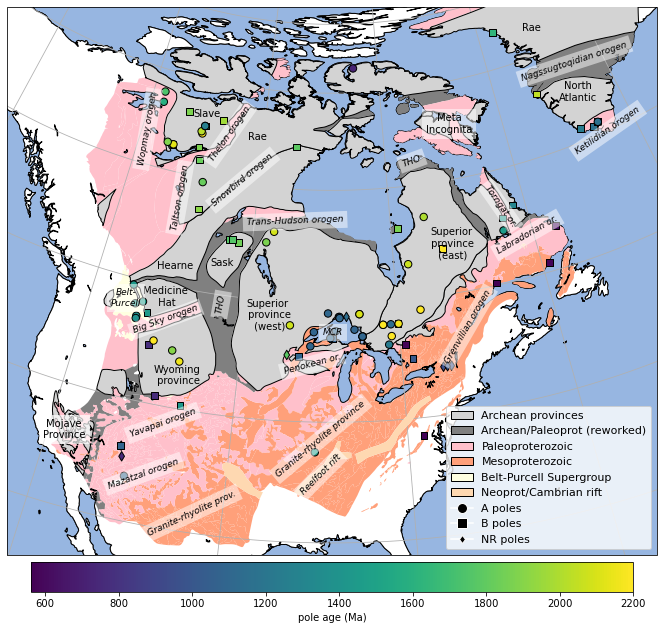

In [25]:
box_props = dict(facecolor='white', alpha=0.5, edgecolor='none')

central_lat = duluth_lat
central_lon = duluth_lon
extent = [duluth_lon-28, duluth_lon+35, duluth_lat-22, duluth_lat+32]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 12))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

land = NaturalEarthFeature(category='physical', name='land',
                            scale='50m', facecolor=COLORS['land'])

ax.add_feature(land, facecolor='white',edgecolor='black')

shpfilename = '../Data/Whitmeyer2007_GIS/Whitmeyer2007.shp'

reader = shpreader.Reader(shpfilename)
units = reader.records()

for unit in units:

    if unit.attributes['Unit'] == 'Basin' or \
       unit.attributes['Unit'] == '2.5 - 2.0 Ga miogeoclinal sediments':
            ax.add_geometries([unit.geometry], ccrs.PlateCarree(),
                  facecolor='lightyellow',
                  label=unit.attributes['Unit'])

    elif unit.attributes['Unit'] == '1.9 - 1.8 Ga reworked Archean crust':
        ax.add_geometries([unit.geometry], ccrs.PlateCarree(),
                  facecolor='grey',
                  label=unit.attributes['Unit'])
    elif unit.attributes['Unit'] == '2.0 - 1.8 Ga juvenile orogens' or \
         unit.attributes['Unit'] == '2.0 - 1.8 Ga juvenile arcs' or \
         unit.attributes['Unit'] == '1.80 - 1.76 Ga juvenile arcs' or \
         unit.attributes['Unit'] == '1.76 - 1.72 Ga juvenile crust' or \
         unit.attributes['Unit'] == '1.72 - 1.68 Ga granitoids' or \
         unit.attributes['Unit'] == '1.69 - 1.65 Ga juvenile crust' or \
         unit.attributes['Unit'] == '1.65 - 1.60 Ga granitoids' or \
         unit.attributes['Unit'] == 'approx 1.70 Ga quartzite deposits' or \
         unit.attributes['Unit'] == 'approx. 1.65 Ga quartzite deposits':
        ax.add_geometries([unit.geometry], ccrs.PlateCarree(),
                           facecolor='pink',
                           label=unit.attributes['Unit'])
    elif unit.attributes['Unit'] == '1.55 - 1.35 Ga juvenile crust' or \
         unit.attributes['Unit'] == '1.45 - 1.35 Ga granitoids' or \
         unit.attributes['Unit'] == '1.3 - 1.0 Ga collisional orogens' or \
         unit.attributes['Unit'] == '1.3 - 0.95 Ga granitoids' or \
         unit.attributes['Unit'] == '1.2 - 1.1 Ga Midcontinent rift system':
        ax.add_geometries([unit.geometry], ccrs.PlateCarree(),
                           facecolor='LightSalmon',
                           label=unit.attributes['Unit'])
        
    elif unit.attributes['Unit'] == '> 2.5 Ga Archean crust':
        ax.add_geometries([unit.geometry], ccrs.PlateCarree(),
                      facecolor='lightgrey',edgecolor='black',
                      label=unit.attributes['Unit'],zorder=80)
        
    elif unit.attributes['Unit'] == 'Eastern rift basins':
        ax.add_geometries([unit.geometry], ccrs.PlateCarree(),
                      facecolor='#fed8b1',
                      label=unit.attributes['Unit'],zorder=81)


ax.gridlines()

ocean = NaturalEarthFeature(category='physical', name='ocean',
                            scale='50m', facecolor=COLORS['water'])
lakes = NaturalEarthFeature(category='physical', name='lakes',
                            scale='50m', facecolor=COLORS['water'])
ax.add_feature(lakes, edgecolor='black')
ax.add_feature(ocean, edgecolor='black',zorder=-1)

A_pole_locales = ax.scatter(poles_A.SLONG.tolist(), poles_A.SLAT.tolist(),
           c=poles_A['nominal age'].tolist(),
           edgecolors='black', s=55,
           transform=ccrs.PlateCarree(),zorder=101,vmin=560,vmax=2200)

B_pole_locales = ax.scatter(poles_B.SLONG.tolist(), poles_B.SLAT.tolist(),
           c=poles_B['nominal age'].tolist(),
           edgecolors='black', s=45, marker='s',
           transform=ccrs.PlateCarree(),zorder=100,vmin=560,vmax=2200)

NR_pole_locales = ax.scatter(poles_NR.SLONG.tolist(), poles_NR.SLAT.tolist(),
           c=poles_NR['nominal age'].tolist(),
           edgecolors='black', s=45, marker='d',
           transform=ccrs.PlateCarree(),zorder=99,vmin=560,vmax=2200)

plt.text(-96.8, 47.5, 'Superior\n province\n (west)',
         horizontalalignment='center',
         transform=ccrs.Geodetic(),zorder=101)

plt.text(-72, 53, 'Superior\n province\n (east)',
         horizontalalignment='center',
         transform=ccrs.Geodetic(),zorder=101)

plt.text(-107,42, 'Wyoming\n province',
         horizontalalignment='center',
         transform=ccrs.Geodetic(),zorder=101)

plt.text(-110.25,48.25, 'Medicine\n Hat',
         horizontalalignment='center',
         transform=ccrs.Geodetic(),zorder=101)

plt.text(-109.5, 46, 'Big Sky orogen',
         horizontalalignment='center',style='italic',size=9,
         transform=ccrs.Geodetic(),zorder=101,rotation=20,bbox=box_props)

plt.text(-110,51.5, 'Hearne',
         horizontalalignment='center',
         transform=ccrs.Geodetic(),zorder=101)

plt.text(-103.75,52.5, 'Sask',
         horizontalalignment='center',
         transform=ccrs.Geodetic(),zorder=101)

plt.text(-101,64.5, 'Rae',
         horizontalalignment='center',
         transform=ccrs.Geodetic(),zorder=101)

plt.text(-50,73, 'Rae',
         horizontalalignment='center',
         transform=ccrs.Geodetic(),zorder=101)

plt.text(-47,63.8, 'North\nAtlantic',
         horizontalalignment='center',
         transform=ccrs.Geodetic(),zorder=101)

plt.text(-110,66, 'Slave',
         horizontalalignment='center',
         transform=ccrs.Geodetic(),zorder=101)

plt.text(-69,64.5, 'Meta\nIncognita',
         horizontalalignment='center',
         transform=ccrs.Geodetic(),zorder=101,bbox=box_props)

plt.text(-118,35.5, 'Mojave\nProvince',
         horizontalalignment='center',
         transform=ccrs.Geodetic(),zorder=101,bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.text(-46.2,65.8, 'Nagssugtoqidian orogen',
         horizontalalignment='center',style='italic',size=9,
         transform=ccrs.Geodetic(),zorder=101,rotation=18,bbox=box_props)

plt.text(-94, 56.7, 'Trans-Hudson orogen',
         horizontalalignment='center',style='italic',size=9,
         transform=ccrs.Geodetic(),zorder=101,rotation=2,bbox=box_props)

plt.text(-103, 48.5, 'THO',
         horizontalalignment='center',style='italic',size=9,
         transform=ccrs.Geodetic(),zorder=101,rotation=80,bbox=box_props)

plt.text(-75.8, 61.8, 'THO',
         horizontalalignment='center',style='italic',size=9,
         transform=ccrs.Geodetic(),zorder=101,rotation=20,bbox=box_props)

plt.text(-117.5,60, 'Wopmay orogen',
         horizontalalignment='center',style='italic',size=9,
         transform=ccrs.Geodetic(),zorder=101,rotation=80,bbox=box_props)

plt.text(-105,62, 'Thelon orogen',
         horizontalalignment='center',style='italic',size=9,
         transform=ccrs.Geodetic(),zorder=101,rotation=55,bbox=box_props)

plt.text(-110.5,55, 'Taltson orogen',
         horizontalalignment='center',style='italic',size=9,
         transform=ccrs.Geodetic(),zorder=101,rotation=80,bbox=box_props)

plt.text(-102,58, 'Snowbird orogen',
         horizontalalignment='center',style='italic',size=9,
         transform=ccrs.Geodetic(),zorder=101,rotation=40,bbox=box_props)

plt.text(-64.3,54.9, 'Torngat or.',
         horizontalalignment='center',style='italic',size=9,
         transform=ccrs.Geodetic(),zorder=101,rotation=-55,bbox=box_props)

plt.text(-91,44, 'Penokean or.',
         horizontalalignment='center',style='italic',size=9,
         transform=ccrs.Geodetic(),zorder=101,rotation=15,bbox=box_props)

plt.text(-107.5,37.5, 'Yavapai orogen',
         horizontalalignment='center',style='italic',size=9,
         transform=ccrs.Geodetic(),zorder=101,rotation=20,bbox=box_props)

plt.text(-108.5,33, 'Mazatzal orogen',
         horizontalalignment='center',style='italic',size=9,
         transform=ccrs.Geodetic(),zorder=101,rotation=20,bbox=box_props)

plt.text(-61.6,52, 'Labradorian or.',
         horizontalalignment='center',style='italic',size=9,
         transform=ccrs.Geodetic(),zorder=101,rotation=30,bbox=box_props)

plt.text(-89.8,35.5, 'Granite-rhyolite province',
         horizontalalignment='center',style='italic',size=9,
         transform=ccrs.Geodetic(),zorder=101,rotation=40,bbox=box_props)

plt.text(-102.8,29.8, 'Granite-rhyolite prov.',
         horizontalalignment='center',style='italic',size=9,
         transform=ccrs.Geodetic(),zorder=101,rotation=25,bbox=box_props)

plt.text(-89.8,34, 'Reelfoot rift',
         horizontalalignment='center',style='italic',size=9,
         transform=ccrs.Geodetic(),zorder=101,rotation=45,bbox=box_props)

plt.text(-88.5,47.3, 'MCR',
         horizontalalignment='center',style='italic',size=9,
         transform=ccrs.Geodetic(),zorder=101,rotation=0,bbox=box_props)

plt.text(-115.2,47.5, 'Belt-\nPurcell',
         horizontalalignment='center',style='italic',size=9,
         transform=ccrs.Geodetic(),zorder=101,rotation=0,bbox=box_props)

plt.text(-72,44, 'Grenvillian orogen',
         horizontalalignment='center',style='italic',size=9,
         transform=ccrs.Geodetic(),zorder=101,rotation=60,bbox=box_props)

plt.text(-46,58, 'Ketilidian orogen',
         horizontalalignment='center',style='italic',size=9,
         transform=ccrs.Geodetic(),zorder=101,rotation=35,bbox=box_props)

legend_elements = [Patch(facecolor='lightgrey', edgecolor='k',
                         label='Archean provinces'),
                   Patch(facecolor='grey', edgecolor='k',
                         label='Archean/Paleoprot (reworked)'),
                    Patch(facecolor='pink', edgecolor='k',
                         label='Paleoproterozoic'),
                    Patch(facecolor='LightSalmon', edgecolor='k',
                         label='Mesoproterozoic'),
                   Patch(facecolor='LightYellow', edgecolor='k',
                         label='Belt-Purcell Supergroup'),
                   Patch(facecolor='#fed8b1', edgecolor='k',
                         label='Neoprot/Cambrian rift'),
                   Line2D([0], [0], marker='o', color='w', label='A poles',
                          markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='s', color='w', label='B poles',
                          markerfacecolor='k', markersize=10),
                  Line2D([0], [0], marker='d', color='w', label='NR poles',
                          markerfacecolor='k', markersize=6)]

plt.legend(handles=legend_elements, loc='upper right',
           bbox_to_anchor=(1,0.282), fancybox=True, fontsize = 11).set_zorder(1000)

plt.colorbar(B_pole_locales,orientation='horizontal',pad=0.01,shrink=0.9,label='pole age (Ma)')
plt.savefig('../Figures/Fig1_map.pdf', bbox_inches = 'tight', pad_inches = 0)
plt.show()

## Split poles by craton
Prior to the amalgamation of the Archean cratons of Laurentia ca. 1.85 Ga, I will consider each of the cratons individually. These cratons are coded out in the *Terrane* field:
- Laurentia-Slave
- Laurentia-Wyoming
- Laurentia-Rae
- Laurentia-Greenland-Nain
- Laurentia-Superior(East)
- Laurentia-Superior(West)
- Laurentia-Superior

Additionally, there are blocks of Laurentia that have undergone subsequent rotations that need to be considered as distinct from the main Laurentia craton and rotated to the main craton in order to be used for tectonic reconstruction:
- Laurentia-Greenland (including Laurentia-Greenland-Nain)
- Laurentia-Scotland
- Laurentia-Svalbard

In [26]:
print(poles_A['Terrane'].unique())
print(poles_B['Terrane'].unique())

['Laurentia-Wyoming' 'Laurentia-Superior(East)' 'Laurentia-Slave'
 'Laurentia-Superior(West)' 'Laurentia-Rae' 'Laurentia'
 'Laurentia-Greenland']
['Laurentia-Superior(East)' 'Laurentia-Slave' 'Laurentia-Greenland-Nain'
 'Laurentia-Rae' 'Laurentia-Superior' 'Laurentia-Trans-Hudson orogen'
 'Laurentia' 'Laurentia-Greenland' 'Laurentia-Scotland'
 'Laurentia-Svalbard']


In [27]:
Laur_poles_A = poles_A[poles_A['Terrane']=='Laurentia']
Laur_poles_A_plon = Laur_poles_A.PLONG.tolist()
Laur_poles_A_plat = Laur_poles_A.PLAT.tolist()
Laur_poles_A_age = Laur_poles_A['nominal age'].tolist()
Laur_poles_A_a95 = Laur_poles_A.A95.tolist()

Laur_poles_B = poles_B[poles_B['Terrane']=='Laurentia']
Laur_poles_B_plon = Laur_poles_B.PLONG.tolist()
Laur_poles_B_plat = Laur_poles_B.PLAT.tolist()
Laur_poles_B_age = Laur_poles_B['nominal age'].tolist()
Laur_poles_B_a95 = Laur_poles_B.A95.tolist()

Laur_poles_NR = poles_NR[poles_NR['Terrane']=='Laurentia']
Laur_poles_NR_plon = Laur_poles_NR.PLONG.tolist()
Laur_poles_NR_plat = Laur_poles_NR.PLAT.tolist()
Laur_poles_NR_age = Laur_poles_NR['nominal age'].tolist()
Laur_poles_NR_a95 = Laur_poles_NR.A95.tolist()

Laur_Slave_poles_A = poles_A[poles_A['Terrane']=='Laurentia-Slave']
Laur_Slave_poles_A_plon = Laur_Slave_poles_A.PLONG.tolist()
Laur_Slave_poles_A_plat = Laur_Slave_poles_A.PLAT.tolist()
Laur_Slave_poles_A_age = Laur_Slave_poles_A['nominal age'].tolist()
Laur_Slave_poles_A_a95 = Laur_Slave_poles_A.A95.tolist()

Laur_Slave_poles_B = poles_B[poles_B['Terrane']=='Laurentia-Slave']
Laur_Slave_poles_B_plon = Laur_Slave_poles_B.PLONG.tolist()
Laur_Slave_poles_B_plat = Laur_Slave_poles_B.PLAT.tolist()
Laur_Slave_poles_B_age = Laur_Slave_poles_B['nominal age'].tolist()
Laur_Slave_poles_B_a95 = Laur_Slave_poles_B.A95.tolist()

Laur_Wyoming_poles_A = poles_A[poles_A['Terrane']=='Laurentia-Wyoming']
Laur_Wyoming_poles_A_plon = Laur_Wyoming_poles_A.PLONG.tolist()
Laur_Wyoming_poles_A_plat = Laur_Wyoming_poles_A.PLAT.tolist()
Laur_Wyoming_poles_A_age = Laur_Wyoming_poles_A['nominal age'].tolist()
Laur_Wyoming_poles_A_a95 = Laur_Wyoming_poles_A.A95.tolist()

Laur_Wyoming_poles_B = poles_B[poles_B['Terrane']=='Laurentia-Wyoming']
Laur_Wyoming_poles_B_plon = Laur_Wyoming_poles_B.PLONG.tolist()
Laur_Wyoming_poles_B_plat = Laur_Wyoming_poles_B.PLAT.tolist()
Laur_Wyoming_poles_B_age = Laur_Wyoming_poles_B['nominal age'].tolist()
Laur_Wyoming_poles_B_a95 = Laur_Wyoming_poles_B.A95.tolist()

Laur_Rae_poles_A = poles_A[poles_A['Terrane']=='Laurentia-Rae']
Laur_Rae_poles_A_plon = Laur_Rae_poles_A.PLONG.tolist()
Laur_Rae_poles_A_plat = Laur_Rae_poles_A.PLAT.tolist()
Laur_Rae_poles_A_age = Laur_Rae_poles_A['nominal age'].tolist()
Laur_Rae_poles_A_a95 = Laur_Rae_poles_A.A95.tolist()

Laur_Rae_poles_B = poles_B[poles_B['Terrane']=='Laurentia-Rae']
Laur_Rae_poles_B_plon = Laur_Rae_poles_B.PLONG.tolist()
Laur_Rae_poles_B_plat = Laur_Rae_poles_B.PLAT.tolist()
Laur_Rae_poles_B_age = Laur_Rae_poles_B['nominal age'].tolist()
Laur_Rae_poles_B_a95 = Laur_Rae_poles_B.A95.tolist()

Laur_Nain_poles_B = poles_B[poles_B['Terrane']=='Laurentia-Greenland-Nain']
Laur_Nain_poles_B_plon = Laur_Nain_poles_B['Laurentia_plon'].tolist()
Laur_Nain_poles_B_plat = Laur_Nain_poles_B['Laurentia_plat'].tolist()
Laur_Nain_poles_B_age = Laur_Nain_poles_B['nominal age'].tolist()
Laur_Nain_poles_B_a95 = Laur_Nain_poles_B.A95.tolist()

Laur_Superior_poles_A = poles_A[poles_A['Terrane']=='Laurentia-Superior']
Laur_Superior_poles_A_plon = Laur_Superior_poles_A.PLONG.tolist()
Laur_Superior_poles_A_plat = Laur_Superior_poles_A.PLAT.tolist()
Laur_Superior_poles_A_age = Laur_Superior_poles_A['nominal age'].tolist()
Laur_Superior_poles_A_a95 = Laur_Superior_poles_A.A95.tolist()

Laur_Superior_poles_B = poles_B[poles_B['Terrane']=='Laurentia-Superior']
Laur_Superior_poles_B_plon = Laur_Superior_poles_B.PLONG.tolist()
Laur_Superior_poles_B_plat = Laur_Superior_poles_B.PLAT.tolist()
Laur_Superior_poles_B_age = Laur_Superior_poles_B['nominal age'].tolist()
Laur_Superior_poles_B_a95 = Laur_Superior_poles_B.A95.tolist()

Laur_SuperiorE_poles_A = poles_A[poles_A['Terrane']=='Laurentia-Superior(East)']
Laur_SuperiorE_poles_A_plon = Laur_SuperiorE_poles_A.PLONG.tolist()
Laur_SuperiorE_poles_A_plat = Laur_SuperiorE_poles_A.PLAT.tolist()
Laur_SuperiorE_poles_A_age = Laur_SuperiorE_poles_A['nominal age'].tolist()
Laur_SuperiorE_poles_A_a95 = Laur_SuperiorE_poles_A.A95.tolist()

Laur_SuperiorE_poles_B = poles_B[poles_B['Terrane']=='Laurentia-Superior(West)']
Laur_SuperiorE_poles_B_plon = Laur_SuperiorE_poles_B.PLONG.tolist()
Laur_SuperiorE_poles_B_plat = Laur_SuperiorE_poles_B.PLAT.tolist()
Laur_SuperiorE_poles_B_age = Laur_SuperiorE_poles_B['nominal age'].tolist()
Laur_SuperiorE_poles_B_a95 = Laur_SuperiorE_poles_B.A95.tolist()

Laur_SuperiorW_poles_A = poles_A[poles_A['Terrane']=='Laurentia-Superior(West)']
Laur_SuperiorW_poles_A_plon = Laur_SuperiorW_poles_A.PLONG.tolist()
Laur_SuperiorW_poles_A_plat = Laur_SuperiorW_poles_A.PLAT.tolist()
Laur_SuperiorW_poles_A_age = Laur_SuperiorW_poles_A['nominal age'].tolist()
Laur_SuperiorW_poles_A_a95 = Laur_SuperiorW_poles_A.A95.tolist()

Laur_SuperiorW_poles_B = poles_B[poles_B['Terrane']=='Laurentia-Superior(East)']
Laur_SuperiorW_poles_B_plon = Laur_SuperiorW_poles_B.PLONG.tolist()
Laur_SuperiorW_poles_B_plat = Laur_SuperiorW_poles_B.PLAT.tolist()
Laur_SuperiorW_poles_B_age = Laur_SuperiorW_poles_B['nominal age'].tolist()
Laur_SuperiorW_poles_B_a95 = Laur_SuperiorW_poles_B.A95.tolist()

Laur_THO_poles_B = poles_B[poles_B['Terrane']=='Laurentia-Trans-Hudson orogen']
Laur_THO_poles_B_plon = Laur_THO_poles_B.PLONG.tolist()
Laur_THO_poles_B_plat = Laur_THO_poles_B.PLAT.tolist()
Laur_THO_poles_B_age = Laur_THO_poles_B['nominal age'].tolist()
Laur_THO_poles_B_a95 = Laur_THO_poles_B.A95.tolist()

Laur_Scotland_poles_B = poles_B[poles_B['Terrane']=='Laurentia-Scotland']
Laur_Scotland_poles_B_plon = Laur_Scotland_poles_B['Laurentia_plon'].tolist()
Laur_Scotland_poles_B_plat = Laur_Scotland_poles_B['Laurentia_plat'].tolist()
Laur_Scotland_poles_B_age = Laur_Scotland_poles_B['nominal age'].tolist()
Laur_Scotland_poles_B_a95 = Laur_Scotland_poles_B.A95.tolist()

Laur_Svalbard_poles_B = poles_B[poles_B['Terrane']=='Laurentia-Svalbard']
Laur_Svalbard_poles_B_plon = Laur_Svalbard_poles_B['Laurentia_plon'].tolist()
Laur_Svalbard_poles_B_plat = Laur_Svalbard_poles_B['Laurentia_plat'].tolist()
Laur_Svalbard_poles_B_age = Laur_Svalbard_poles_B['nominal age'].tolist()
Laur_Svalbard_poles_B_a95 = Laur_Svalbard_poles_B.A95.tolist()

Laur_Greenland_poles_B = poles_B[poles_B['Terrane']=='Laurentia-Greenland']
Laur_Greenland_poles_B_plon = Laur_Greenland_poles_B['Laurentia_plon'].tolist()
Laur_Greenland_poles_B_plat = Laur_Greenland_poles_B['Laurentia_plat'].tolist()
Laur_Greenland_poles_B_age = Laur_Greenland_poles_B['nominal age'].tolist()
Laur_Greenland_poles_B_a95 = Laur_Greenland_poles_B.A95.tolist()

# Plot poles

## Plot Laurentia poles post-Paleoproterozoic amalgamation

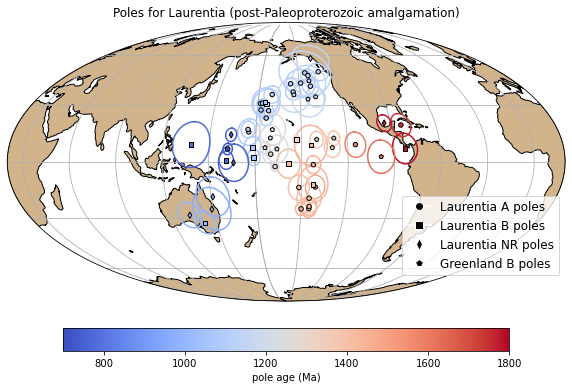

In [28]:
map_axis = ipmag.make_mollweide_map(central_longitude=200,figsize=(10,10))

ipmag.plot_poles_colorbar(map_axis,Laur_poles_A_plon,Laur_poles_A_plat,Laur_poles_A_a95,
                          Laur_poles_A_age,700,1800,marker='o',colorbar=False,colormap='coolwarm')
ipmag.plot_poles_colorbar(map_axis,Laur_poles_B_plon[:-6],Laur_poles_B_plat[:-6],Laur_poles_B_a95[:-6],
                          Laur_poles_B_age[:-6],700,1800,marker='s',colormap='coolwarm')
ipmag.plot_poles_colorbar(map_axis,Laur_poles_NR_plon,Laur_poles_NR_plat,Laur_poles_NR_a95,
                          Laur_poles_NR_age,700,1800,marker='d',colorbar=False,colormap='coolwarm')

ipmag.plot_poles_colorbar(map_axis,Laur_Greenland_poles_B_plon,Laur_Greenland_poles_B_plat,Laur_Greenland_poles_B_a95,
                          Laur_Greenland_poles_B_age,720,1800,marker='p',colorbar=False,colormap='coolwarm')

plt.title('Poles for Laurentia (post-Paleoproterozoic amalgamation)')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Laurentia A poles',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='s', color='w', label='Laurentia B poles',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='d', color='w', label='Laurentia NR poles',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='p', color='w', label='Greenland B poles',
                          markerfacecolor='k', markersize=8),]

plt.legend(handles=legend_elements, loc='upper right',
           bbox_to_anchor=(1.0,0.4), fancybox=True, fontsize = 12)
plt.savefig('../Figures/code_output/Laurentia_poles.pdf')
plt.show()

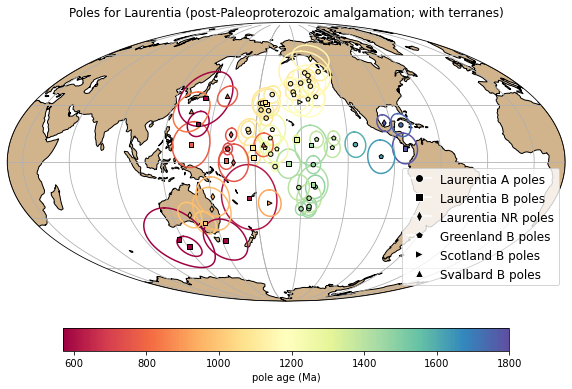

In [29]:
map_axis = ipmag.make_mollweide_map(central_longitude=200,figsize=(10,10))
ipmag.plot_poles_colorbar(map_axis,Laur_poles_A_plon,Laur_poles_A_plat,Laur_poles_A_a95,
                          Laur_poles_A_age,570,1800,marker='o',colorbar=False,colormap='Spectral')
ipmag.plot_poles_colorbar(map_axis,Laur_poles_B_plon,Laur_poles_B_plat,Laur_poles_B_a95,
                          Laur_poles_B_age,570,1800,marker='s',colormap='Spectral')
ipmag.plot_poles_colorbar(map_axis,Laur_poles_NR_plon,Laur_poles_NR_plat,Laur_poles_NR_a95,
                          Laur_poles_NR_age,570,1800,marker='d',colorbar=False,colormap='Spectral')
ipmag.plot_poles_colorbar(map_axis,Laur_Greenland_poles_B_plon,Laur_Greenland_poles_B_plat,Laur_Greenland_poles_B_a95,
                          Laur_Greenland_poles_B_age,570,1800,marker='p',colorbar=False,colormap='Spectral')
ipmag.plot_poles_colorbar(map_axis,Laur_Scotland_poles_B_plon,Laur_Scotland_poles_B_plat,Laur_Scotland_poles_B_a95,
                          Laur_Scotland_poles_B_age,570,1800,marker='>',colorbar=False,colormap='Spectral')
ipmag.plot_poles_colorbar(map_axis,Laur_Svalbard_poles_B_plon,Laur_Svalbard_poles_B_plat,Laur_Svalbard_poles_B_a95,
                          Laur_Svalbard_poles_B_age,570,1800,marker='^',colorbar=False,colormap='Spectral')
plt.title('Poles for Laurentia (post-Paleoproterozoic amalgamation; with terranes)')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Laurentia A poles',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='s', color='w', label='Laurentia B poles',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='d', color='w', label='Laurentia NR poles',
                          markerfacecolor='k', markersize=8),
                  Line2D([0], [0], marker='p', color='w', label='Greenland B poles',
                          markerfacecolor='k', markersize=8),
                  Line2D([0], [0], marker='>', color='w', label='Scotland B poles',
                          markerfacecolor='k', markersize=8),
                  Line2D([0], [0], marker='^', color='w', label='Svalbard B poles',
                          markerfacecolor='k', markersize=8)]

plt.legend(handles=legend_elements, loc='upper right',
           bbox_to_anchor=(1.0,0.5), fancybox=True, fontsize = 12)
plt.savefig('../Figures/code_output/Laurentia_poles_w_terranes.pdf')
plt.show()

In [30]:
Laur_Scotland_poles_B_age

[1199.0, 925.0]

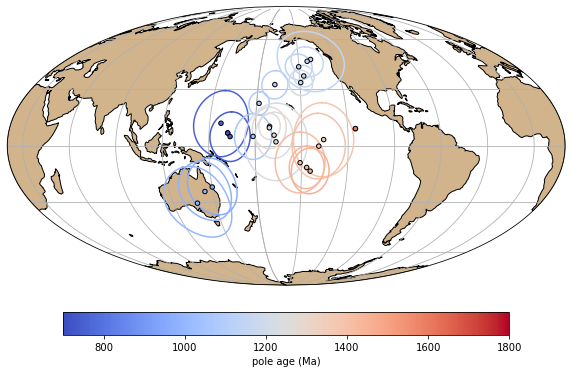

In [31]:
map_axis = ipmag.make_mollweide_map(central_longitude=200,figsize=(10,10))
ipmag.plot_poles_colorbar(map_axis,RM_40_20_1800_500.PLONG.tolist(),RM_40_20_1800_500.PLAT.tolist(),RM_40_20_1800_500.A95.tolist(),
                          RM_40_20_1800_500['nominal age'].tolist(),700,1800,marker='o',colorbar=True,colormap='coolwarm')

plt.savefig('../Figures/code_output/Laurentia_poles_running_mean.pdf')
plt.show()

## Investigate the Belt poles vs. other poles in that time interval

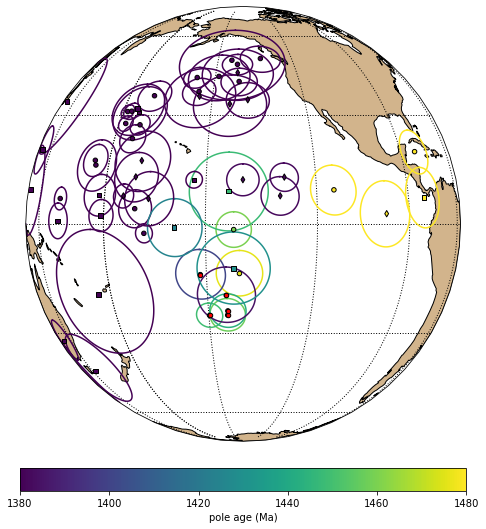

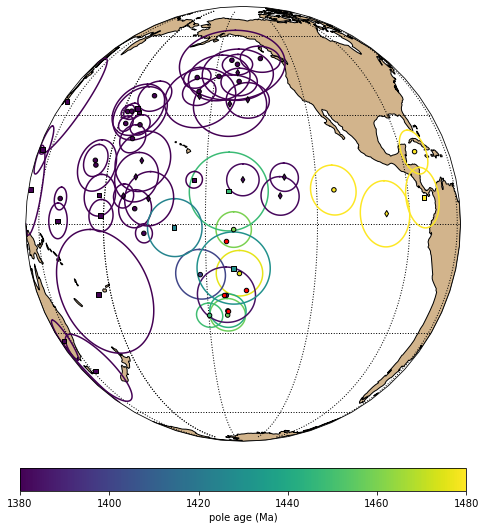

In [32]:
map_axis = ipmag.make_orthographic_map(central_longitude=220,figsize=(10,10))


ipmag.plot_poles_colorbar(map_axis,Laur_poles_A_plon,Laur_poles_A_plat,Laur_poles_A_a95,
                          Laur_poles_A_age,1380,1480,marker='o',colorbar=True,colormap='viridis')
ipmag.plot_poles_colorbar(map_axis,Laur_poles_B_plon,Laur_poles_B_plat,Laur_poles_B_a95,
                          Laur_poles_B_age,1380,1480,marker='s',colorbar=False,colormap='viridis')
ipmag.plot_poles_colorbar(map_axis,Laur_Greenland_poles_B_plon,Laur_Greenland_poles_B_plat,Laur_Greenland_poles_B_a95,
                          Laur_Greenland_poles_B_age,1380,1480,marker='d',colorbar=False,colormap='viridis')

Laur_poles_Belt = poles_A[poles_A['Pole_citation_code']=='\cite{Elston2002a}']
Laur_poles_Belt_plon = Laur_poles_Belt.PLONG.tolist()
Laur_poles_Belt_plat = Laur_poles_Belt.PLAT.tolist()
Laur_poles_Belt_age = Laur_poles_Belt['nominal age'].tolist()
Laur_poles_Belt_A95 = Laur_poles_Belt.A95.tolist()

ipmag.plot_poles(map_axis,Laur_poles_Belt_plon,Laur_poles_Belt_plat,np.zeros(len(Laur_poles_Belt_plon)),color='red')
plt.show()

map_axis = ipmag.make_orthographic_map(central_longitude=220,figsize=(10,10))


ipmag.plot_poles_colorbar(map_axis,Laur_poles_A_plon,Laur_poles_A_plat,Laur_poles_A_a95,
                          Laur_poles_A_age,1380,1480,marker='o',colorbar=True,colormap='viridis')
ipmag.plot_poles_colorbar(map_axis,Laur_poles_B_plon,Laur_poles_B_plat,Laur_poles_B_a95,
                          Laur_poles_B_age,1380,1480,marker='s',colorbar=False,colormap='viridis')
ipmag.plot_poles_colorbar(map_axis,Laur_Greenland_poles_B_plon,Laur_Greenland_poles_B_plat,Laur_Greenland_poles_B_a95,
                          Laur_Greenland_poles_B_age,1380,1480,marker='d',colorbar=False,colormap='viridis')

Laur_poles_Belt = poles_A[poles_A['Pole_citation_code']=='\cite{Elston2002a}']
Laur_poles_Belt_plon = Laur_poles_Belt.PLONf.tolist()
Laur_poles_Belt_plat = Laur_poles_Belt.PLATf.tolist()
Laur_poles_Belt_age = Laur_poles_Belt['nominal age'].tolist()
Laur_poles_Belt_A95 = Laur_poles_Belt.A95f.tolist()

ipmag.plot_poles(map_axis,Laur_poles_Belt_plon,Laur_poles_Belt_plat,np.zeros(len(Laur_poles_Belt_plon)),color='red')

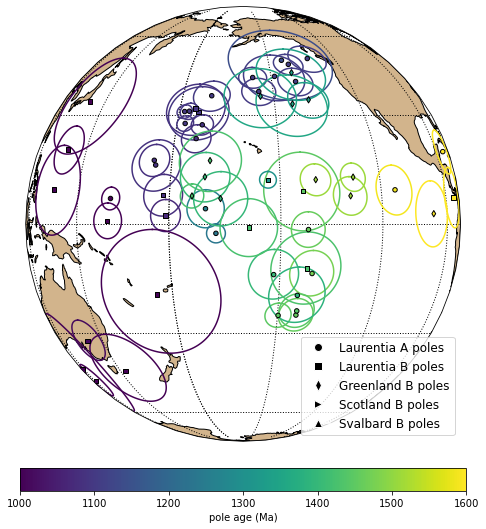

In [33]:
map_axis = ipmag.make_orthographic_map(central_longitude=200,figsize=(10,10))

ipmag.plot_poles_colorbar(map_axis,Laur_poles_A_plon,Laur_poles_A_plat,Laur_poles_A_a95,
                          Laur_poles_A_age,1000,1600,marker='o',colorbar=True,colormap='viridis')
ipmag.plot_poles_colorbar(map_axis,Laur_poles_B_plon,Laur_poles_B_plat,Laur_poles_B_a95,
                          Laur_poles_B_age,1000,1600,marker='s',colorbar=False,colormap='viridis')
ipmag.plot_poles_colorbar(map_axis,Laur_Greenland_poles_B_plon,Laur_Greenland_poles_B_plat,Laur_Greenland_poles_B_a95,
                          Laur_Greenland_poles_B_age,720,1500,marker='d',colorbar=False,colormap='viridis')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Laurentia A poles',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='s', color='w', label='Laurentia B poles',
                          markerfacecolor='k', markersize=8),
                  Line2D([0], [0], marker='d', color='w', label='Greenland B poles',
                          markerfacecolor='k', markersize=8),
                  Line2D([0], [0], marker='>', color='w', label='Scotland B poles',
                          markerfacecolor='k', markersize=8),
                  Line2D([0], [0], marker='^', color='w', label='Svalbard B poles',
                          markerfacecolor='k', markersize=8)]

plt.legend(handles=legend_elements, loc='lower right', fancybox=True, fontsize = 12)
plt.show()

# Paleolatitude through time

## Import Phanerozoic poles

To make a complete paleolatitude through time visualization, I will utilize poles from the Torsvik et al. 2012 compilation of Phanerozoic paleomagnetic poles.

In [34]:
Torsvik2012_poles = pd.read_csv('../Data/Torsvik_Laurentia_Pole_Compilation.csv')

Following Swanson-Hysell and Macdonald (2017), we drop the remagnetized St. George  Group limestone and Tablehead Group limestone Mean poles

In [35]:
Torsvik2012_poles_filtered = Torsvik2012_poles[Torsvik2012_poles.Formation!='St. George  Group  limestone']
Torsvik2012_poles_filtered = Torsvik2012_poles_filtered[Torsvik2012_poles_filtered.Formation!='Tablehead Group  limestone Mean']

Laurentia and Baltica were drifting independently until the Caledonian Orogeny at ca. 430–420 Ma. At this point their pole path can be merged into a single "Laurussia'' path until the opening of that Atlantic (Torsvik et al., 2012). Here I will import the poles for Europe and then rotate them into Laurentia coordinates.

In [36]:
Torsvik2012_Europe_poles = pd.read_csv('../Data/Torsvik_Europe_Pole_Compilation.csv')
Torsvik2012_Europe_poles.head()

,Q,A95,Com,Formation,Lat,Lon,CLat,CLon,RLat,RLon,EULER,Age,GPDB RefNo/Reference,RLat_Laur,RLon_Laur
0,4,3.6,NaN,West Eifel volcanics,-80.6,267.5,-80.6,267.5,-80.6,-92.3,( 18.3/-47/ .1),0.5,"1513,T",NaN,NaN
1,4,4.4,NaN,East Eifel volcanics,-86.4,296.1,-86.4,296.1,-86.4,-63.1,( 18.3/-47/ .1),0.5,"1505,T",NaN,NaN
2,3,12.9,NaN,Volcanics NW Germany,-84.3,357.7,-84.3,357.7,-83.9,5.8,( 18/-26.7/ 1),8.0,"56,T",NaN,NaN
3,5,1.8,N,"Prado section, Teruel, Spain",-78.9,328.3,-78.9,328.3,-78.9,-25.8,( 17.9/-26.4/ 1.1),9.5,Abels et al. (2009),NaN,NaN
4,5,3.5,N,"Cascante, Spain",-77.4,314.2,-77.4,314.2,-77.7,-40.4,( 18.5/-26.3/ 1.2),10.0,Abdul Aziz et al. (2004),NaN,NaN


In [37]:
euler_pole = [78.6,161.9,-31.0] #Europe vs NA Euler pre-220 Ma from Torsvik et al. 2012

for pole in Torsvik2012_Europe_poles.index:
    if Torsvik2012_Europe_poles.Age[pole] > 220 and Torsvik2012_Europe_poles.Age[pole] < 420:
        pole_lat = Torsvik2012_Europe_poles.CLat[pole]
        pole_lon = Torsvik2012_Europe_poles.CLon[pole]
        rotated_lat, rotated_lon = pmag.pt_rot(euler_pole,[pole_lat,pole_lat],[pole_lon,pole_lon])
        Torsvik2012_Europe_poles.RLon_Laur[pole] = rotated_lon[0]
        Torsvik2012_Europe_poles.RLat_Laur[pole] = rotated_lat[0]
Torsvik2012_Europe_poles.head()

,Q,A95,Com,Formation,Lat,Lon,CLat,CLon,RLat,RLon,EULER,Age,GPDB RefNo/Reference,RLat_Laur,RLon_Laur
0,4,3.6,NaN,West Eifel volcanics,-80.6,267.5,-80.6,267.5,-80.6,-92.3,( 18.3/-47/ .1),0.5,"1513,T",NaN,NaN
1,4,4.4,NaN,East Eifel volcanics,-86.4,296.1,-86.4,296.1,-86.4,-63.1,( 18.3/-47/ .1),0.5,"1505,T",NaN,NaN
2,3,12.9,NaN,Volcanics NW Germany,-84.3,357.7,-84.3,357.7,-83.9,5.8,( 18/-26.7/ 1),8.0,"56,T",NaN,NaN
3,5,1.8,N,"Prado section, Teruel, Spain",-78.9,328.3,-78.9,328.3,-78.9,-25.8,( 17.9/-26.4/ 1.1),9.5,Abels et al. (2009),NaN,NaN
4,5,3.5,N,"Cascante, Spain",-77.4,314.2,-77.4,314.2,-77.7,-40.4,( 18.5/-26.3/ 1.2),10.0,Abdul Aziz et al. (2004),NaN,NaN


In [38]:
Torsvik2012_Europe_poles_filtered = Torsvik2012_Europe_poles[Torsvik2012_Europe_poles.RLat_Laur.notnull()]
Torsvik2012_Europe_poles_filtered.head()

,Q,A95,Com,Formation,Lat,Lon,CLat,CLon,RLat,RLon,EULER,Age,GPDB RefNo/Reference,RLat_Laur,RLon_Laur
46,5,4.6,NaN,Sunnhordland dike,-50.0,305.0,-50.0,305.0,-56.9,45.8,( 46/ 3.9/ 58.2),221.0,"T, Walderhaug (1993)",-54.615530,279.672776
47,6,6.0,NaN,Gipskeuper sediments,-49.0,311.0,-49.0,311.0,-52.9,46.9,( 46/ 3.9/ 58.2),226.0,"3141,T",-53.165986,286.041616
48,5,2.9,N,"Taimyr Sills, Siberia",-47.1,301.6,-47.1,301.6,-57.8,39.2,( 46/ 3.9/ 58.2),228.0,Walderhaug et al. (2005),-51.965907,275.421347
49,6,3.0,NaN,"Heming limestone, France",-54.0,321.0,-54.0,321.0,-49.4,58.3,( 46/ 3.9/ 58.2),234.0,"2411,T",-57.250666,298.072784
50,6,12.0,NaN,"Musschelkalk carbonates, Poland",-53.0,303.0,-53.0,303.0,-59.1,50.4,( 46/ 3.9/ 58.2),234.0,"3253,T",-57.737687,278.064262


We can use the ipmag.lat_from_pole function to calculate the paleolatitude of a point of interest (in this case Duluth, Minnesota) implied by each paleomagnetic pole in the compilations.

In [39]:
Phanerozoic_plat_list = []
for pole in Torsvik2012_poles_filtered.index:
    plat = ipmag.lat_from_pole(duluth_lon,duluth_lat,Torsvik2012_poles_filtered.CLon[pole],Torsvik2012_poles_filtered.CLat[pole])
    Phanerozoic_plat_list.append(-plat)
    
Phanerozoic_plat_list_Europe = []
for pole in Torsvik2012_Europe_poles_filtered.index:
    plat = ipmag.lat_from_pole(duluth_lon,duluth_lat,Torsvik2012_Europe_poles_filtered.RLon_Laur[pole],Torsvik2012_Europe_poles_filtered.RLat_Laur[pole])
    Phanerozoic_plat_list_Europe.append(-plat)

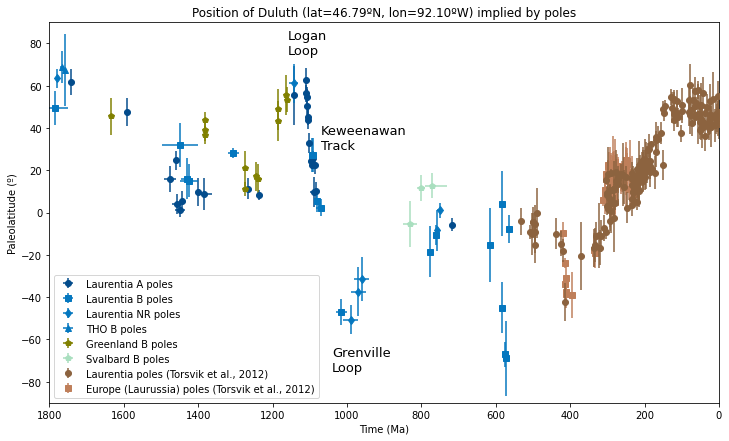

In [40]:
def plot_poles(title=None,paleomagia=False,xaxislabel=True,xaxisticklabels=True):
    plt.errorbar(Laur_poles_A['nominal age'], Laur_poles_A['Duluth_plat'],
                 yerr = Laur_poles_A['A95'], xerr = [Laur_poles_A['age_error_low'],Laur_poles_A['age_error_high']], fmt='o',
                 color='#034C8C',label='Laurentia A poles')
    plt.errorbar(Laur_poles_B['nominal age'], Laur_poles_B['Duluth_plat'],
                 yerr = Laur_poles_B['A95'], xerr = [Laur_poles_B['age_error_low'],Laur_poles_B['age_error_high']], fmt='s',
                 color='#0477BF',label='Laurentia B poles')
    plt.errorbar(Laur_poles_NR['nominal age'], Laur_poles_NR['Duluth_plat'],
                 yerr = Laur_poles_NR['A95'], xerr = [Laur_poles_NR['age_error_low'],Laur_poles_NR['age_error_high']], fmt='d',
                 color='#0477BF',label='Laurentia NR poles')
    plt.errorbar(Laur_THO_poles_B['nominal age'], Laur_THO_poles_B['Duluth_plat'],
                 yerr = Laur_THO_poles_B['A95'], xerr = [Laur_THO_poles_B['age_error_low'],Laur_THO_poles_B['age_error_high']], fmt='^',
                 color='#0477BF',label='THO B poles')
    plt.errorbar(Laur_Greenland_poles_B['nominal age'], Laur_Greenland_poles_B['Duluth_plat'],
                 yerr = Laur_Greenland_poles_B['A95'], xerr = [Laur_Greenland_poles_B['age_error_low'],Laur_Greenland_poles_B['age_error_high']],
                 fmt='p', color='#808000',label='Greenland B poles')
    plt.errorbar(Laur_Svalbard_poles_B['nominal age'], Laur_Svalbard_poles_B['Duluth_plat'],
                 yerr = Laur_Svalbard_poles_B['A95'], xerr = [Laur_Svalbard_poles_B['age_error_low'],Laur_Svalbard_poles_B['age_error_high']],
                 fmt='p', color='#A9DFBF' , label='Svalbard B poles')
    plt.errorbar(Torsvik2012_poles_filtered.Age, Phanerozoic_plat_list,
                 yerr = Torsvik2012_poles_filtered.A95, fmt='o',
                 color='#8C633F',label='Laurentia poles (Torsvik et al., 2012)',zorder=1000)
    plt.errorbar(Torsvik2012_Europe_poles_filtered.Age, Phanerozoic_plat_list_Europe,
                 yerr = Torsvik2012_Europe_poles_filtered.A95, fmt='s',color='#BF7F5A',
                 label='Europe (Laurussia) poles (Torsvik et al., 2012)')
    
    if paleomagia==True:
        plt.errorbar(paleomagia_Laurentia['AGE'], paleomagia_Laurentia['Duluth_plat'],
                     yerr = paleomagia_Laurentia['A95'], xerr = [paleomagia_Laurentia['age_error_low'],paleomagia_Laurentia['age_error_high']], fmt='o',
                     color='lightgrey',label='Laurentia poles (Paleomagia)',zorder=-1)
    plt.text(1160,75,'Logan\nLoop',fontsize=13) 
    plt.text(1070,30,'Keweenawan\nTrack',fontsize=13)
    plt.text(1040,-75,'Grenville\nLoop',fontsize=13)
    plt.ylim(-90,90)
    plt.xlim(0,1800)
    if xaxisticklabels is not True:
        plt.gca().tick_params(labelbottom=False) 
    if xaxislabel is True:
        plt.xlabel('Time (Ma)')
    plt.ylabel('Paleolatitude (º)')
    if title != None:
        plt.title(title)
    plt.gca().invert_xaxis()
    plt.legend(loc=3)
    
plt.figure(figsize=(12,7))
plot_poles(title='Position of Duluth (lat=46.79ºN, lon=92.10ºW) implied by poles')
plt.show()

In [41]:
Laur_Svalbard_poles_B

,Terrane,ROCKNAME,-10.3,COMPONENT,TESTS,TILT,SLAT,SLONG,B,N,DEC,INC,abs(I),KD,ED95,PLAT,PLONG,DP,DM,A95,f,INCf,PLATf,PLONf,DPf,DMf,A95f,%REV,DEMAGCODE,40,24,10,16,2,3,4,5,6,7,Q(7),Grade,nominal age,lomagage,himagage,REF/method,ROCKNAME.1,POLE AUTHORS,YEAR,JOURNAL,VOLUME,VPAGES,TITLE,Overlap_Comment,Pole_citation_code,Geochron_citation_code,Notes_Changes_from_Leirubakki,Plate_ID,Laurentia_plon,Laurentia_plat,age_error_high,age_error_low,age,Duluth_plat
93,Laurentia-Svalbard,Lower Grusdievbreen Formation,new,NaN,Fo,100.0,79.0,18.0,4.0,53.0,354.4,16.1,16.1,39.9,14.7,19.6,204.9,7.8,15.1,10.852649,0.8,19.8,21.2,203.9,8.0,15.4,11.1,MIXED,4.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,5.0,B,830.5,811.0,850.0,"pre-Bitter Springs, authors",Lower Grusdievbreen Formation,"Maloof,A.C., Halverson,G.P., Kirschvink,J.L., ...",2006.0,Geol.Soc.Am.Bulletin,118,1099-1124,"Combined paleomagnetic, isotopic, and stratigr...",NaN,\cite{Maloof2006a},NaN,NaN,10296,134.500091,26.671588,19.5,19.5,831$^{+20}$$_{-20}$,-5.340778
94,Laurentia-Svalbard,Upper Grusdievbreen Formation,new,NaN,Fo,100.0,78.9,18.2,5.0,107.0,126.3,14.7,14.7,84.2,8.4,-1.1,252.6,4.4,8.6,6.151423,0.8,18.2,2.7,71.0,4.5,8.7,6.3,MIXED,4.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,5.0,B,800.0,789.0,811.0,"789-811, authors",Upper Grusdievbreen Formation,"Maloof,A.C., Halverson,G.P., Kirschvink,J.L., ...",2006.0,Geol.Soc.Am.Bulletin,118,1099-1124,"Combined paleomagnetic, isotopic, and stratigr...",NaN,\cite{Maloof2006a},NaN,NaN,10296,185.303922,8.913216,11.0,11.0,800$^{+11}$$_{-11}$,11.542398
97,Laurentia-Svalbard,Svanbergfjellet Formation,new,NaN,F*+,100.0,78.5,18.0,1.0,18.0,333.2,29.4,29.4,25.2,7.0,25.9,226.8,4.3,7.7,5.754129,0.8,35.2,29.6,227.3,4.7,8.1,6.1,0or100,4.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,4.0,B,770.0,730.0,789.0,"pre-Islay anomaly, post BS, authors",Svanbergfjellet Formation,"Maloof,A.C., Halverson,G.P., Kirschvink,J.L., ...",2006.0,Geol.Soc.Am.Bulletin,118,1099-1124,"Combined paleomagnetic, isotopic, and stratigr...",NaN,\cite{Maloof2006a},NaN,updated age,10296,157.135350,35.142357,19.0,40.0,770$^{+19}$$_{-40}$,12.776348


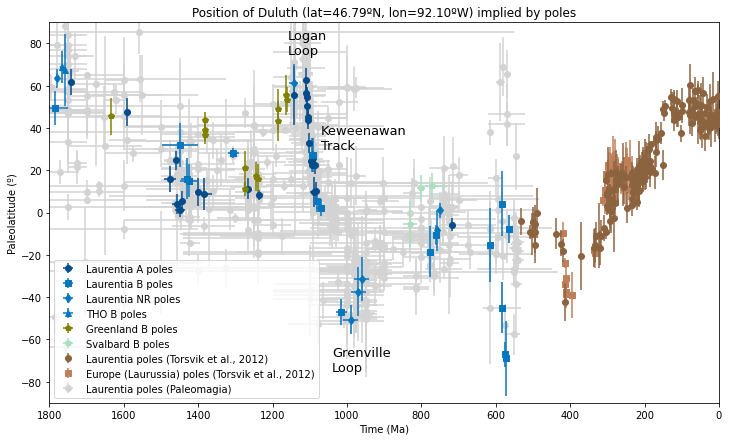

In [42]:
plt.figure(figsize=(12,7))
plot_poles(title='Position of Duluth (lat=46.79ºN, lon=92.10ºW) implied by poles',paleomagia=True)
plt.show()

## Exporting a simply Laurentia paleolatitude .csv

In [43]:
Leirubakki_poles.to_csv('Leirubakki_Laurentia_compilation.csv')

## The position of Laurentia in the Li et al. 2008 and Pisarevsky et al. 2014 models

In [44]:
Li2008_Eulers = pd.read_csv('../Models/Li2008_Laurentia_Eulers.csv')
Li2008_Eulers['duluth_paleolat'] = pd.Series()
Li2008_Eulers

,Age,Euler_lat,Euler_lon,Euler_angle,duluth_paleolat
0,1100,64.47,-167.30,-175.54,NaN
1,1050,43.54,179.56,-168.63,NaN
2,1000,24.21,175.25,-150.19,NaN
3,900,37.73,160.50,-163.44,NaN
4,825,41.45,-174.49,128.25,NaN
5,780,36.51,176.68,-129.83,NaN
6,750,49.11,-170.92,-137.63,NaN
7,720,40.40,-170.86,-138.02,NaN
8,630,32.71,-157.56,-144.78,NaN
9,600,34.13,-158.66,-132.40,NaN


In [45]:
P2014_Eulers = pd.read_csv('../Models/Pisarevsky2014b_Laurentia_Eulers.csv')
P2014_Eulers['duluth_paleolat'] = pd.Series()
P2014_Eulers

,Age,Euler_lat,Euler_lon,Euler_angle,duluth_paleolat
0,1770,-52.03,60.09,215.25,NaN
1,1720,-53.49,67.66,212.01,NaN
2,1650,-55.43,47.53,189.94,NaN
3,1580,-54.53,52.84,191.84,NaN
4,1500,-59.30,53.77,179.10,NaN
5,1470,-41.88,52.75,173.88,NaN
6,1450,-49.45,47.34,166.33,NaN
7,1380,-49.30,49.97,168.03,NaN
8,1270,-45.58,33.22,147.89,NaN


In [46]:
for i in Li2008_Eulers.index:
    euler_lat = Li2008_Eulers.Euler_lat[i]
    euler_lon = Li2008_Eulers.Euler_lon[i]
    euler_angle = Li2008_Eulers.Euler_angle[i]

    lat, lon = pmag.pt_rot([euler_lat, euler_lon, euler_angle], [duluth_lat], [duluth_lon])
    duluth_paleolat = lat[0]
    
    Li2008_Eulers['duluth_paleolat'][i] = duluth_paleolat
    
Li2008_Eulers

,Age,Euler_lat,Euler_lon,Euler_angle,duluth_paleolat
0,1100,64.47,-167.30,-175.54,34.903414
1,1050,43.54,179.56,-168.63,-6.188141
2,1000,24.21,175.25,-150.19,-47.366926
3,900,37.73,160.50,-163.44,-30.357317
4,825,41.45,-174.49,128.25,32.555008
5,780,36.51,176.68,-129.83,-28.519786
6,750,49.11,-170.92,-137.63,0.215659
7,720,40.40,-170.86,-138.02,-13.606083
8,630,32.71,-157.56,-144.78,-16.024210
9,600,34.13,-158.66,-132.40,-16.229725


In [47]:
for i in P2014_Eulers.index:
    euler_lat = P2014_Eulers.Euler_lat[i]
    euler_lon = P2014_Eulers.Euler_lon[i]
    euler_angle = P2014_Eulers.Euler_angle[i]

    lat, lon = pmag.pt_rot([euler_lat, euler_lon, euler_angle], [duluth_lat], [duluth_lon])
    duluth_paleolat = lat[0]
    
    P2014_Eulers['duluth_paleolat'][i] = duluth_paleolat
    
P2014_Eulers   

,Age,Euler_lat,Euler_lon,Euler_angle,duluth_paleolat
0,1770,-52.03,60.09,215.25,60.996380
1,1720,-53.49,67.66,212.01,63.429716
2,1650,-55.43,47.53,189.94,52.206509
3,1580,-54.53,52.84,191.84,54.495932
4,1500,-59.30,53.77,179.10,57.497603
5,1470,-41.88,52.75,173.88,26.525925
6,1450,-49.45,47.34,166.33,34.031351
7,1380,-49.30,49.97,168.03,35.937816
8,1270,-45.58,33.22,147.89,13.120830


## Import the centroid motion paths for Laurentia resulting from different paleogeographic models

These motion paths are calculated in the Laurentia_motion_paths notebook for:
- Torsvik and Cocks, 2017
- Swanson-Hysell and Macdonald, 2017 modification of Torsvik and Cocks, 2017
- Merdith et al. 2017
- simple Laurentia model

In [48]:
Torsvik2017_duluth = pd.read_csv('../models/motion_paths/Torsvik_2017_duluth_reconstruct.csv',names=['orig_index','time','plat','plon'],skiprows=1)
SHM_2017_duluth = pd.read_csv('../models/motion_paths/SH_2017_duluth_reconstruct.csv',names=['orig_index','time','plat','plon'],skiprows=1)
W_2013_duluth = pd.read_csv('../models/motion_paths/W_2013_duluth_reconstruct.csv',names=['orig_index','time','plat','plon'],skiprows=1)
SH_simple_duluth = pd.read_csv('../models/motion_paths/SH_prot_duluth_simple_reconstruct.csv',names=['orig_index','time','plat','plon'],skiprows=1)
M_2017_duluth = pd.read_csv('../models/motion_paths/M_2017_duluth_reconstruct.csv',names=['orig_index','time','plat','plon'],skiprows=1)
LEH_2013_duluth = pd.read_csv('../models/motion_paths/LEH_2013_duluth_reconstruct.csv',names=['orig_index','time','plat','plon'],skiprows=1)
SH_simple_duluth = SH_simple_duluth[SH_simple_duluth.time>519]

In [49]:
def calc_rate(motion_path_dataframe):
    motion_path_dataframe['cm_yr'] = 0.0
    
    for n in motion_path_dataframe.index[:-1]:
        angle_delta = pmag.angle([motion_path_dataframe.plon[n],motion_path_dataframe.plat[n]],[motion_path_dataframe.plon[n+1],motion_path_dataframe.plat[n+1]])
        km_traveled = angle_delta[0] * 111.3 
        cm_traveled = km_traveled * 1000 * 100
        time_elapsed_Myr = motion_path_dataframe.time[n]-motion_path_dataframe.time[n+1]
        time_elapsed_yr = time_elapsed_Myr * 1000000
        cm_yr = cm_traveled/time_elapsed_yr
        motion_path_dataframe['cm_yr'][n] = cm_yr

In [50]:
calc_rate(Torsvik2017_duluth)
calc_rate(SHM_2017_duluth)
calc_rate(W_2013_duluth)
calc_rate(SH_simple_duluth)
calc_rate(M_2017_duluth)
calc_rate(LEH_2013_duluth)
M_2017_duluth.tail()

,orig_index,time,plat,plon,cm_yr
685,685,414.0,-12.801690,-122.217155,2.165415
686,686,413.0,-12.976065,-122.128637,2.165415
687,687,412.0,-13.148290,-122.035729,2.165415
688,688,411.0,-13.318259,-121.938475,2.165415
689,689,410.0,-13.485871,-121.836923,0.000000


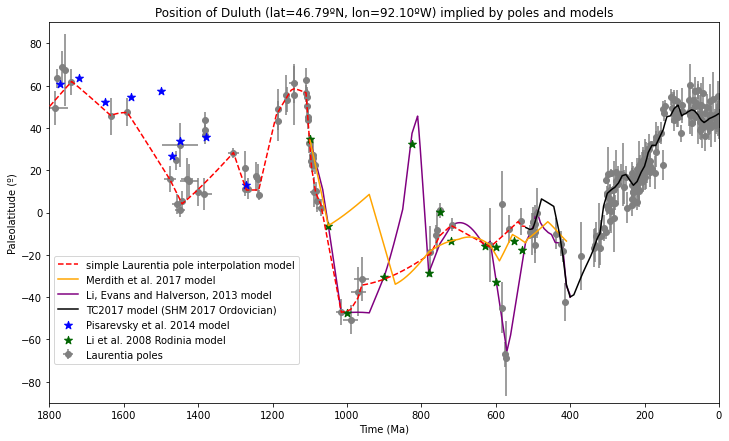

In [51]:
plt.figure(figsize=(12,7))
def plot_poles_models(title=None,xaxislabel=True,xaxisticklabels=True):
    
    plt.errorbar(Laur_poles_A['nominal age'], Laur_poles_A['Duluth_plat'],
                 yerr = Laur_poles_A['A95'], xerr = [Laur_poles_A['age_error_low'],Laur_poles_A['age_error_high']],
                 fmt='o', color='grey',label='Laurentia poles') #034C8C Laurentia A poles (Leirubakki, 2017)
    plt.errorbar(Laur_poles_B['nominal age'], Laur_poles_B['Duluth_plat'],
                 yerr = Laur_poles_B['A95'], xerr = [Laur_poles_B['age_error_low'],Laur_poles_B['age_error_high']], 
                 fmt='o', color='grey',label='_nolegend_') #0477BF s label='Laurentia B poles (Leirubakki, 2017)'
    plt.errorbar(Laur_poles_NR['nominal age'], Laur_poles_NR['Duluth_plat'],
                 yerr = Laur_poles_NR['A95'], xerr = [Laur_poles_NR['age_error_low'],Laur_poles_NR['age_error_high']], 
                 fmt='o', color='grey', label='_nolegend_') #0477BF d label='Laurentia NR poles (Leirubakki, 2017)'
    plt.errorbar(Laur_THO_poles_B['nominal age'], Laur_THO_poles_B['Duluth_plat'],
                 yerr = Laur_THO_poles_B['A95'], xerr = [Laur_THO_poles_B['age_error_low'],Laur_THO_poles_B['age_error_high']], 
                 fmt='o', color='grey', label='_nolegend_') #0477BF fmt='^' ,label='THO B poles (Leirubakki, 2017)'
    plt.errorbar(Laur_Greenland_poles_B['nominal age'], Laur_Greenland_poles_B['Duluth_plat'],
                 yerr = Laur_Greenland_poles_B['A95'], xerr = [Laur_Greenland_poles_B['age_error_low'],Laur_Greenland_poles_B['age_error_high']],
                 fmt='o', color='grey' , label='_nolegend_') #808000 fmt='p' label='Greenland B poles (Leirubakki, 2017)'
#     plt.errorbar(Laur_Svalbard_poles_B['nominal age'], Laur_Svalbard_poles_B['Duluth_plat'],
#                  yerr = Laur_Svalbard_poles_B['A95'], xerr = [Laur_Svalbard_poles_B['age_error_low'],Laur_Svalbard_poles_B['age_error_high']],
#                  fmt='o', color='grey' , label='_nolegend_') #808000 fmt='p' label='Greenland B poles (Leirubakki, 2017)'
    plt.errorbar(Torsvik2012_poles_filtered.Age, Phanerozoic_plat_list,
                 yerr = Torsvik2012_poles_filtered.A95, fmt='o',
                 color='grey', label='_nolegend_') #8C633F ,label='Laurentia poles (Torsvik et al., 2012)',

    plt.scatter(P2014_Eulers['Age'],P2014_Eulers['duluth_paleolat'],color='blue',
                marker='*',s=70, label='Pisarevsky et al. 2014 model',zorder=1001)
    plt.scatter(Li2008_Eulers['Age'],Li2008_Eulers['duluth_paleolat'],color='darkgreen',
                marker='*',s=70, label='Li et al. 2008 Rodinia model',zorder=1002)
    plt.plot(SH_simple_duluth['time'],SH_simple_duluth['plat'],
             color='red',linestyle='--',label='simple Laurentia pole interpolation model',zorder=1003)
    plt.plot(M_2017_duluth['time'],M_2017_duluth['plat'],
             color='orange',label='Merdith et al. 2017 model',zorder=1004)
    plt.plot(LEH_2013_duluth['time'],LEH_2013_duluth['plat'],
             color='purple',label='Li, Evans and Halverson, 2013 model')
    plt.plot(SHM_2017_duluth['time'],SHM_2017_duluth['plat'],
             color='black',linestyle='-',label='TC2017 model (SHM 2017 Ordovician)',zorder=1005)

    plt.ylim(-90,90)
    plt.xlim(0,1800)
    if xaxisticklabels is not True:
        plt.gca().tick_params(labelbottom=False) 
    if xaxislabel is True:
        plt.xlabel('Time (Ma)')
    plt.ylabel('Paleolatitude (º)')
    if title != None:
        plt.title(title)
    plt.gca().invert_xaxis()
    plt.legend(bbox_to_anchor=(0.38,0.4))
    
plot_poles_models(title='Position of Duluth (lat=46.79ºN, lon=92.10ºW) implied by poles and models')
plt.show()

In [52]:
timescale = pd.read_csv('../Data/ages.csv')
timescale

,era,b_age,t_age,abbr,color
0,Eoarchean,4000,3600,Eoarch.,white
1,Paleoarchean,3600,3200,Paleoarch.,white
2,Mesoarchean,3200,2800,Mesoarch.,white
3,Neoarchean,2800,2500,Neoarch.,white
4,Paleoproterozoic,2500,1600,Paleoprot.,white
5,Mesoproterozoic,1600,1000,Mesoprot.,white
6,Neoproterozoic,1000,539,Neoprot.,white
7,Phanerozoic,539,0,Phan.,white


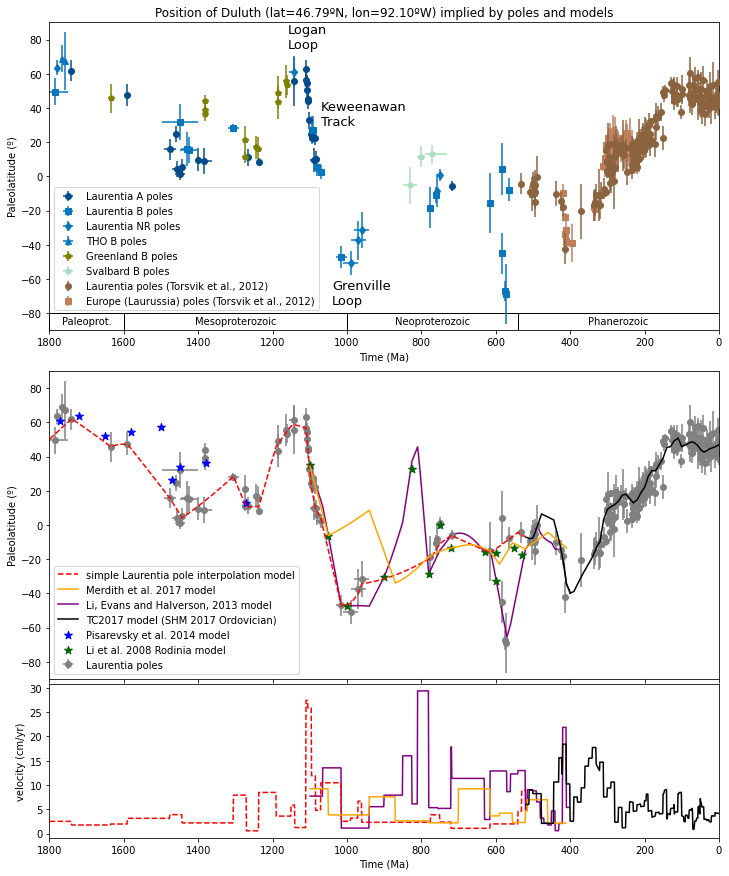

In [53]:
plt.figure(figsize=(12,15))
gs = gridspec.GridSpec(4, 1, height_ratios=[1, 0.1, 1, 0.5],hspace=0.025)

ax0 = plt.subplot(gs[0])
plot_poles(title='Position of Duluth (lat=46.79ºN, lon=92.10ºW) implied by poles and models',
           xaxislabel=True,xaxisticklabels=True)
plt.legend(bbox_to_anchor=(0.41,0.48))

for era in timescale.index[4:]:  
    if timescale['abbr'][era] == 'Paleoprot.':
        start = 1800
        end = timescale['t_age'][era]
        rect = plt.Rectangle((end,-90), start-end, 10, facecolor='white',edgecolor='black',linestyle='-')
        ax0.add_patch(rect)
        name = timescale['abbr'][era]
        plt.text((start+end)/2,-85,name,
                 verticalalignment='center',horizontalalignment='center')
    else:
        start = timescale['b_age'][era]
        end = timescale['t_age'][era]
        rect = plt.Rectangle((end,-90), start-end, 10, facecolor='white',edgecolor='black',linestyle='-')
        ax0.add_patch(rect)
        name = timescale['era'][era]
        plt.text((start+end)/2,-85,name,
             verticalalignment='center',horizontalalignment='center')

ax1 = plt.subplot(gs[2])
plot_poles_models(xaxislabel=False,xaxisticklabels=False)
plt.legend(loc=3)


        
ax2 = plt.subplot(gs[3])  
plt.plot(SH_simple_duluth['time'][:-1],SH_simple_duluth['cm_yr'][:-1],
         color='red',linestyle='--',label='simple Laurentia pole interpolation model',zorder=1003)
plt.plot(M_2017_duluth['time'][:-1],M_2017_duluth['cm_yr'][:-1],
         color='orange',label='Merdith et al. 2017 model',zorder=1004)
plt.plot(LEH_2013_duluth['time'][:-2],LEH_2013_duluth['cm_yr'][:-2],
         color='purple',label='Li, Evans and Halverson, 2013 model')
plt.plot(SHM_2017_duluth['time'][:-1],SHM_2017_duluth['cm_yr'][:-1],
         color='black',linestyle='-',label='TC2017 model (S-H 2017 Ordovician)',zorder=1005)
plt.ylabel('velocity (cm/yr)')
plt.xlim(0,1800)
plt.xlabel('Time (Ma)')
plt.gca().invert_xaxis()


plt.tight_layout()
plt.savefig('../Figures/Laurentia_paleolatitude.pdf', bbox_inches = 'tight',
    pad_inches = 0)

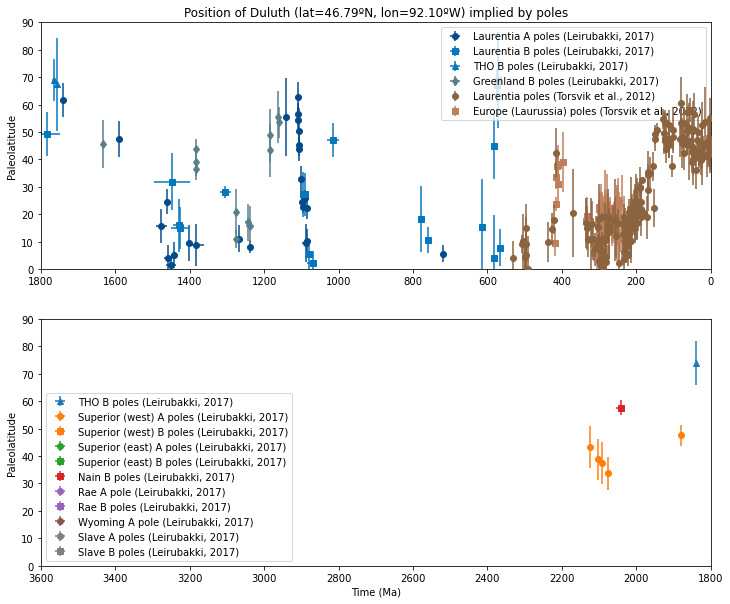

In [54]:
plt.figure(figsize=(12,10))

plt.subplot(2,1,1)

plt.errorbar(Laur_poles_A['nominal age'], np.abs(Laur_poles_A['Duluth_plat']),
             yerr = Laur_poles_A['A95'], xerr = [Laur_poles_A['age_error_low'],Laur_poles_A['age_error_high']], fmt='o',
             color='#034C8C',label='Laurentia A poles (Leirubakki, 2017)')
plt.errorbar(Laur_poles_B['nominal age'], np.abs(Laur_poles_B['Duluth_plat']),
             yerr = Laur_poles_B['A95'], xerr = [Laur_poles_B['age_error_low'],Laur_poles_B['age_error_high']], fmt='s',
             color='#0477BF',label='Laurentia B poles (Leirubakki, 2017)')
plt.errorbar(Laur_THO_poles_B['nominal age'], np.abs(Laur_THO_poles_B['Duluth_plat']),
             yerr = Laur_THO_poles_B['A95'], xerr = [Laur_THO_poles_B['age_error_low'],Laur_THO_poles_B['age_error_high']], fmt='^',
             color='#0477BF',label='THO B poles (Leirubakki, 2017)')
plt.errorbar(Laur_Greenland_poles_B['nominal age'], np.abs(Laur_Greenland_poles_B['Duluth_plat']),
             yerr = Laur_Greenland_poles_B['A95'], xerr = [Laur_Greenland_poles_B['age_error_low'],Laur_Greenland_poles_B['age_error_high']],
             fmt='d', color='#587E8C',label='Greenland B poles (Leirubakki, 2017)')
plt.errorbar(Torsvik2012_poles_filtered.Age, np.abs(Phanerozoic_plat_list),
             yerr = Torsvik2012_poles_filtered.A95, fmt='o',
             color='#8C633F',label='Laurentia poles (Torsvik et al., 2012)',zorder=1000)
plt.errorbar(Torsvik2012_Europe_poles_filtered.Age, np.abs(Phanerozoic_plat_list_Europe),
             yerr = Torsvik2012_Europe_poles_filtered.A95, fmt='s',color='#BF7F5A',
             label='Europe (Laurussia) poles (Torsvik et al., 2012)')

plt.ylim(0,90)
plt.xlim(1800,0)
plt.ylabel('Paleolatitude')
plt.title('Position of Duluth (lat=46.79ºN, lon=92.10ºW) implied by poles')
plt.legend(loc=1)

plt.subplot(2,1,2)

plt.errorbar(Laur_THO_poles_B['nominal age'], np.abs(Laur_THO_poles_B['Duluth_plat']),
             yerr = Laur_THO_poles_B['A95'], xerr = [Laur_THO_poles_B['age_error_low'],Laur_THO_poles_B['age_error_high']],
             fmt='^', color='C0', label='THO B poles (Leirubakki, 2017)')

plt.errorbar(Laur_SuperiorW_poles_A['nominal age'], np.abs(Laur_SuperiorW_poles_A['Duluth_plat']),
             yerr = Laur_SuperiorW_poles_A['A95'], xerr = [Laur_SuperiorW_poles_A['age_error_low'],Laur_SuperiorW_poles_A['age_error_high']],
             fmt='o', color='C1', label='Superior (west) A poles (Leirubakki, 2017)')
plt.errorbar(Laur_SuperiorW_poles_B['nominal age'], np.abs(Laur_SuperiorW_poles_B['Duluth_plat']),
             yerr = Laur_SuperiorW_poles_B['A95'], xerr = [Laur_SuperiorW_poles_B['age_error_low'],Laur_SuperiorW_poles_B['age_error_high']],
             fmt='s', color='C1', label='Superior (west) B poles (Leirubakki, 2017)')

plt.errorbar(Laur_SuperiorE_poles_A['nominal age'], np.abs(Laur_SuperiorE_poles_A['Duluth_plat']),
             yerr = Laur_SuperiorE_poles_A['A95'], xerr = [Laur_SuperiorE_poles_A['age_error_low'],Laur_SuperiorE_poles_A['age_error_high']],
             fmt='o', color='C2', label='Superior (east) A poles (Leirubakki, 2017)')
plt.errorbar(Laur_SuperiorE_poles_B['nominal age'], np.abs(Laur_SuperiorE_poles_B['Duluth_plat']),
             yerr = Laur_SuperiorE_poles_B['A95'], xerr = [Laur_SuperiorE_poles_B['age_error_low'],Laur_SuperiorE_poles_B['age_error_high']],
             fmt='s', color='C2', label='Superior (east) B poles (Leirubakki, 2017)')

plt.errorbar(Laur_Nain_poles_B['nominal age'], np.abs(Laur_Nain_poles_B['Duluth_plat']),
             yerr = Laur_Nain_poles_B['A95'], xerr = [Laur_Nain_poles_B['age_error_low'],Laur_Nain_poles_B['age_error_high']],
             fmt='s', color='C3', label='Nain B poles (Leirubakki, 2017)')

plt.errorbar(Laur_Rae_poles_A['nominal age'], np.abs(Laur_Rae_poles_A['Duluth_plat']),
             yerr = Laur_Rae_poles_A['A95'], xerr = [Laur_Rae_poles_A['age_error_low'],Laur_Rae_poles_A['age_error_high']],
             fmt='o', color='C4', label='Rae A pole (Leirubakki, 2017)')
plt.errorbar(Laur_Rae_poles_B['nominal age'], np.abs(Laur_Rae_poles_B['Duluth_plat']),
             yerr = Laur_Rae_poles_B['A95'], xerr = [Laur_Rae_poles_B['age_error_low'],Laur_Rae_poles_B['age_error_high']],
             fmt='s', color='C4', label='Rae B poles (Leirubakki, 2017)')

plt.errorbar(Laur_Wyoming_poles_A['nominal age'], np.abs(Laur_Wyoming_poles_A['Duluth_plat']),
             yerr = Laur_Wyoming_poles_A['A95'], xerr = [Laur_Wyoming_poles_A['age_error_low'],Laur_Wyoming_poles_A['age_error_high']],
             fmt='o', color='C5', label='Wyoming A pole (Leirubakki, 2017)')

plt.errorbar(Laur_Slave_poles_A['nominal age'], np.abs(Laur_Slave_poles_A['Duluth_plat']),
             yerr = Laur_Slave_poles_A['A95'], xerr = [Laur_Slave_poles_A['age_error_low'],Laur_Slave_poles_A['age_error_high']],
             fmt='o', color='C7', label='Slave A poles (Leirubakki, 2017)')
plt.errorbar(Laur_Slave_poles_B['nominal age'], np.abs(Laur_Slave_poles_B['Duluth_plat']),
             yerr = Laur_Slave_poles_B['A95'], xerr = [Laur_Slave_poles_B['age_error_low'],Laur_Slave_poles_B['age_error_high']],
             fmt='s', color='C7', label='Slave B poles (Leirubakki, 2017)')

plt.ylim(0,90)
plt.xlim(3600, 1800)
plt.xlabel('Time (Ma)')
plt.ylabel('Paleolatitude')
plt.legend(loc=3)
plt.show()

## Plot Laurentia poles pre-Paleoproterozoic amalgamation

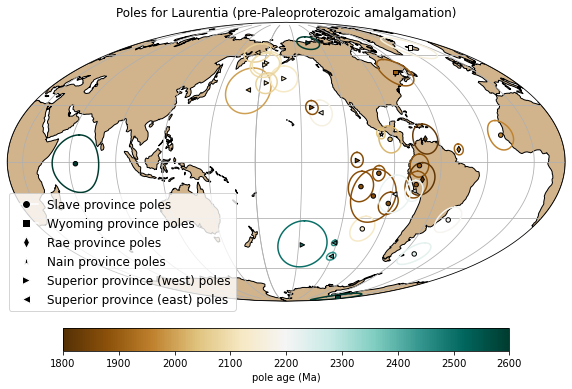

In [55]:
map_axis = ipmag.make_mollweide_map(central_longitude=200,figsize=(10,10))
#Slave poles
ipmag.plot_poles_colorbar(map_axis,Laur_Slave_poles_A_plon,Laur_Slave_poles_A_plat,Laur_Slave_poles_A_a95,
                          Laur_Slave_poles_A_age,1800,2600,marker='o',colorbar=False,colormap='BrBG')
ipmag.plot_poles_colorbar(map_axis,Laur_Slave_poles_B_plon,Laur_Slave_poles_B_plat,Laur_Slave_poles_B_a95,
                          Laur_Slave_poles_B_age,1800,2600,marker='o',colormap='BrBG')
#Wyoming poles
ipmag.plot_poles_colorbar(map_axis,Laur_Wyoming_poles_A_plon,
                          Laur_Wyoming_poles_A_plat,Laur_Wyoming_poles_A_a95,
                          Laur_Wyoming_poles_A_age,1800,2600,marker='s',colorbar=False,colormap='BrBG')
ipmag.plot_poles_colorbar(map_axis,Laur_Wyoming_poles_B_plon,
                          Laur_Wyoming_poles_B_plat,Laur_Wyoming_poles_B_a95,
                          Laur_Wyoming_poles_B_age,1800,2600,marker='s',colorbar=False,colormap='BrBG')
#Rae poles
ipmag.plot_poles_colorbar(map_axis,Laur_Rae_poles_A_plon,Laur_Rae_poles_A_plat,Laur_Rae_poles_A_a95,
                          Laur_Rae_poles_A_age,1800,2600,marker='d',colorbar=False,colormap='BrBG')
ipmag.plot_poles_colorbar(map_axis,Laur_Rae_poles_B_plon,Laur_Rae_poles_B_plat,Laur_Rae_poles_B_a95,
                          Laur_Rae_poles_B_age,1800,2600,marker='d',colorbar=False,colormap='BrBG')
#Nain poles
ipmag.plot_poles_colorbar(map_axis,Laur_Nain_poles_B_plon,Laur_Nain_poles_B_plat,Laur_Nain_poles_B_a95,
                          Laur_Nain_poles_B_age,1800,2600,marker='*',colorbar=False,colormap='BrBG')

#Superior poles CHANGING SYMBOLS NOW UPDATE KEY SUPERIOR ALL TRIANGLES
ipmag.plot_poles_colorbar(map_axis,Laur_Superior_poles_A_plon,Laur_Superior_poles_A_plat,Laur_Superior_poles_A_a95,
                          Laur_Superior_poles_A_age,1800,2600,marker='>',colorbar=False,colormap='BrBG')
ipmag.plot_poles_colorbar(map_axis,Laur_Superior_poles_B_plon,Laur_Superior_poles_B_plat,Laur_Superior_poles_B_a95,
                          Laur_Superior_poles_B_age,1800,2600,marker='>',colorbar=False,colormap='BrBG')
ipmag.plot_poles_colorbar(map_axis,Laur_SuperiorE_poles_A_plon,Laur_SuperiorE_poles_A_plat,Laur_SuperiorE_poles_A_a95,
                          Laur_SuperiorE_poles_A_age,1800,2600,marker='<',colorbar=False,colormap='BrBG')
ipmag.plot_poles_colorbar(map_axis,Laur_SuperiorE_poles_B_plon,Laur_SuperiorE_poles_B_plat,Laur_SuperiorE_poles_B_a95,
                          Laur_SuperiorE_poles_B_age,1800,2600,marker='<',colorbar=False,colormap='BrBG')
ipmag.plot_poles_colorbar(map_axis,Laur_SuperiorW_poles_A_plon,Laur_SuperiorW_poles_A_plat,Laur_SuperiorW_poles_A_a95,
                          Laur_SuperiorW_poles_A_age,1800,2600,marker='>',colorbar=False,colormap='BrBG')
ipmag.plot_poles_colorbar(map_axis,Laur_SuperiorW_poles_B_plon,Laur_SuperiorW_poles_B_plat,Laur_SuperiorW_poles_B_a95,
                          Laur_SuperiorW_poles_B_age,1800,2600,marker='>',colorbar=False,colormap='BrBG')

plt.title('Poles for Laurentia (pre-Paleoproterozoic amalgamation)')

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Slave province poles',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='s', color='w', label='Wyoming province poles',
                          markerfacecolor='k', markersize=8),
                  Line2D([0], [0], marker='d', color='w', label='Rae province poles',
                          markerfacecolor='k', markersize=8),
                  Line2D([0], [0], marker='*', color='w', label='Nain province poles',
                          markerfacecolor='k', markersize=8),
                  Line2D([0], [0], marker='>', color='w', label='Superior province (west) poles',
                          markerfacecolor='k', markersize=8),
                  Line2D([0], [0], marker='<', color='w', label='Superior province (east) poles',
                          markerfacecolor='k', markersize=8)]

plt.legend(handles=legend_elements, loc='upper right',
           bbox_to_anchor=(0.42,0.41), fancybox=True, fontsize = 12)
plt.savefig('../Figures/code_output/Laurentia_poles_preUnited.pdf')
plt.show()

# Plots for individual Archean cratons

### Evaluating differential motion of Slave and Superior

## Superior craton poles

### Molson dykes B+C2
The pole that is used is that calculated within Evans and Halls (2010). It is unclear whether the Molson dykes pole from the West Superior Craton should be corrected into East Superior Craton coordinates or not as the age of that rotation is not well-constrained. The dates associated with the poles come from Halls and Heaman (2000) in which a U-Pb zircon concordia intercept date of 1877 (+7/-4) was published and an another associated dike (without direct paleomagnetic data) has a date of 1884 ± 2 Ma (Heaman et al. 1986).

Evans and Halls (2010) propose that an Euler rotation of (51º N, 85º W, −14º CCW) be used reconstruct western Superior relative to eastern Superior and interpret that the rotation occured in the time interval of 2.07 to 1.87 Ga. They develop combined poles for the units that exist on both sides of the Kapuskasing Structural Zone. These combined poles are imported below along with all poles in both west and east coordinates.

In [56]:
Superior_poles = pd.read_excel('../Data/Evans2010_Superior_poles.xlsx')
Superior_poles

,Pole,Age,Age_uncertainty,Plat_W_frame,Plon_W_frame,Plat_E_frame,Plon_E_frame,A95,1234567,Q,References,Leirubakki_rating
0,Otto Stock lamproph.,2680.0,≤2680 ± 1,-62.0,45.0,-69.0,47.0,5.0,111c101,6,Pullaiah and Irving (1975) and Buchan et\nal. ...,B
1,Ptarm.-Mistassinia,2505.0,2505 ± 2,-52.4,229.9,-45.3,213.0,13.8,1010101,4,"Fahrig et al. (1986), Buchan et al. (1998), re...",B
2,Matachewan R,2459.5,2473–2446,-48.1,257.4,-44.1,238.3,1.6,111C101,6,See text; Evans and Halls (2010) (W + E),A
3,Matachewan N,2446.0,2446 ± 3,-55.6,261.5,-52.3,239.5,2.4,111C101,6,See text; Evans and Halls (2010) (W + E),A
4,Nipissing N1 (B),2217.0,2217 ± 4,-16.0,286.0,-17.0,272.0,10.0,111C111,7,Buchan et al. (2000) (E),A
5,Senneterre (B),2216.0,2216 + 8/-4,-12.9,297.3,-15.3,284.3,6.0,111C111,7,Buchan et al. (1993) (E),A
6,Biscotasing (N),2172.0,2172–2167,19.6,232.3,26.0,223.9,7.0,111C100,5,"Buchan et al. (1993) (E), Halls and Davis (200...",A
7,Marathon N,2123.5,2126–2121,45.4,198.2,54.1,188.9,7.7,1110100,4,Buchan et al. (1996) and Halls et al. (2008) (W),A
8,Marathon R,2103.5,2106–2101,55.1,182.2,63.8,168.9,7.5,111C100,5,Buchan et al. (1996) and Halls et al. (2008) (W),A
9,Cauchon Lake (R)a,2091.0,2091 ± 2,53.8,180.9,62.4,167.3,7.7,111C100,5,Halls and Heaman (2000); recalc. Evans and Hal...,A


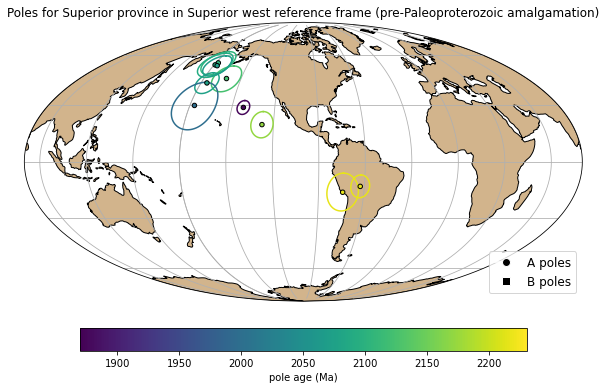

In [57]:
map_axis = ipmag.make_mollweide_map(central_longitude=260,figsize=(10,10))
ipmag.plot_poles_colorbar(map_axis,Superior_poles.Plon_W_frame[4:].tolist(),
                          Superior_poles.Plat_W_frame[4:].tolist(),
                          Superior_poles.A95[4:].tolist(),
                          Superior_poles.Age[4:].tolist(),1870,2230,
                          marker='o',colormap='viridis')
plt.title('Poles for Superior province in Superior west reference frame (pre-Paleoproterozoic amalgamation)')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='A poles',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='s', color='w', label='B poles',
                          markerfacecolor='k', markersize=8)]

plt.legend(handles=legend_elements, loc='upper right',
           bbox_to_anchor=(1,0.2), fancybox=True, fontsize = 12)
plt.show()

Plot up all poles from Slave except for the ca. 2625 Ma Defeat suite pole.

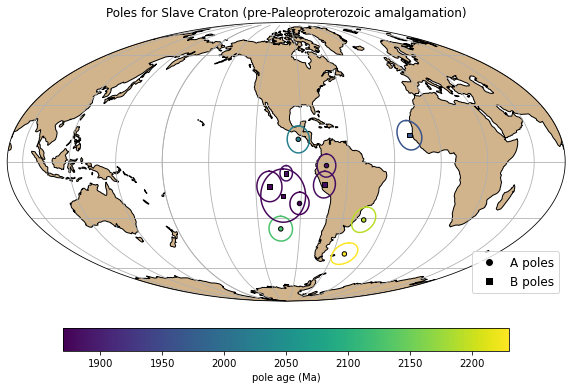

In [58]:
map_axis = ipmag.make_mollweide_map(central_longitude=260,figsize=(10,10))
ipmag.plot_poles_colorbar(map_axis,Laur_Slave_poles_A_plon,Laur_Slave_poles_A_plat,Laur_Slave_poles_A_a95,
                          Laur_Slave_poles_A_age,1870,2230,marker='o',colorbar=False,colormap='viridis')
ipmag.plot_poles_colorbar(map_axis,Laur_Slave_poles_B_plon[1:],Laur_Slave_poles_B_plat[1:],Laur_Slave_poles_B_a95[1:],
                          Laur_Slave_poles_B_age[1:],1870,2230,marker='s',colormap='viridis')
plt.title('Poles for Slave Craton (pre-Paleoproterozoic amalgamation)')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='A poles',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='s', color='w', label='B poles',
                          markerfacecolor='k', markersize=8)]

plt.legend(handles=legend_elements, loc='upper right',
           bbox_to_anchor=(1,0.2), fancybox=True, fontsize = 12)
plt.show()

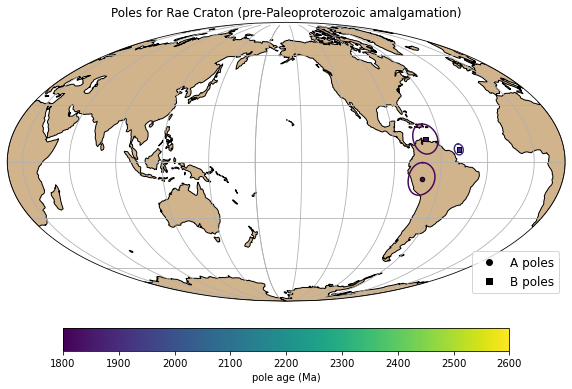

In [59]:
map_axis = ipmag.make_mollweide_map(central_longitude=200,figsize=(10,10))
ipmag.plot_poles_colorbar(map_axis,Laur_Rae_poles_A_plon,Laur_Rae_poles_A_plat,Laur_Rae_poles_A_a95,
                          Laur_Rae_poles_A_age,1800,2600,marker='o',colorbar=False)
ipmag.plot_poles_colorbar(map_axis,Laur_Rae_poles_B_plon,Laur_Rae_poles_B_plat,Laur_Rae_poles_B_a95,
                          Laur_Rae_poles_B_age,1800,2600,marker='s')
plt.title('Poles for Rae Craton (pre-Paleoproterozoic amalgamation)')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='A poles',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='s', color='w', label='B poles',
                          markerfacecolor='k', markersize=8)]

plt.legend(handles=legend_elements, loc='upper right',
           bbox_to_anchor=(1,0.2), fancybox=True, fontsize = 12)
#plt.savefig('./Figures/Laurentia_Rae_poles.pdf')
plt.show()

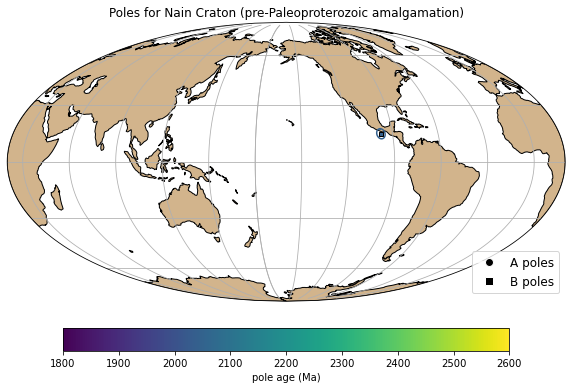

In [60]:
map_axis = ipmag.make_mollweide_map(central_longitude=200,figsize=(10,10))
ipmag.plot_poles_colorbar(map_axis,Laur_Nain_poles_B_plon,Laur_Nain_poles_B_plat,Laur_Nain_poles_B_a95,
                          Laur_Nain_poles_B_age,1800,2600,marker='s')
plt.title('Poles for Nain Craton (pre-Paleoproterozoic amalgamation)')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='A poles',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='s', color='w', label='B poles',
                          markerfacecolor='k', markersize=8)]

plt.legend(handles=legend_elements, loc='upper right',
           bbox_to_anchor=(1,0.2), fancybox=True, fontsize = 12)
#plt.savefig('./Figures/Laurentia_Nain_poles.pdf')
plt.show()

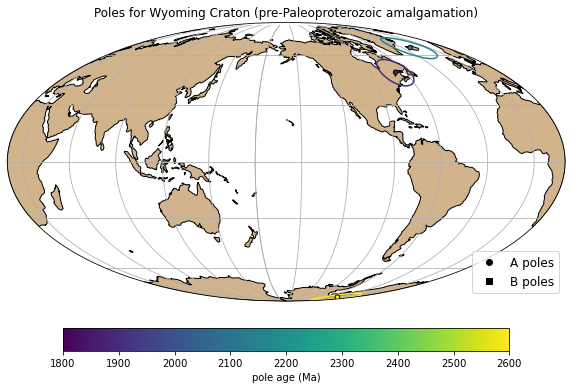

In [61]:
map_axis = ipmag.make_mollweide_map(central_longitude=200,figsize=(10,10))
ipmag.plot_poles_colorbar(map_axis,Laur_Wyoming_poles_A_plon,
                          Laur_Wyoming_poles_A_plat,Laur_Wyoming_poles_A_a95,
                          Laur_Wyoming_poles_A_age,1800,2600,marker='o',colorbar=False)
ipmag.plot_poles_colorbar(map_axis,Laur_Wyoming_poles_B_plon,
                          Laur_Wyoming_poles_B_plat,Laur_Wyoming_poles_B_a95,
                          Laur_Wyoming_poles_B_age,1800,2600,marker='s')
plt.title('Poles for Wyoming Craton (pre-Paleoproterozoic amalgamation)')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='A poles',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='s', color='w', label='B poles',
                          markerfacecolor='k', markersize=8)]

plt.legend(handles=legend_elements, loc='upper right',
           bbox_to_anchor=(1,0.2), fancybox=True, fontsize = 12)
#plt.savefig('./Figures/Laurentia_Wyoming_poles.pdf')
plt.show()

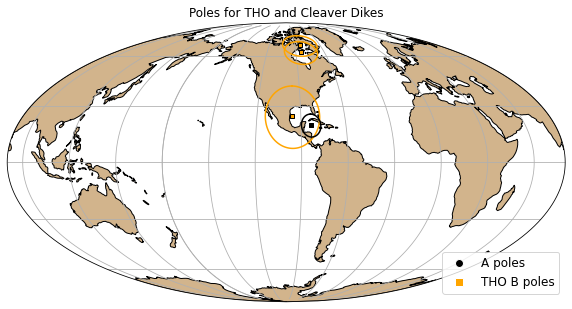

In [62]:
map_axis = ipmag.make_mollweide_map(central_longitude=260,figsize=(10,10))
ipmag.plot_poles(map_axis,Laur_THO_poles_B_plon,
                 Laur_THO_poles_B_plat,
                 Laur_THO_poles_B_a95,
                 color='orange',marker='s')
ipmag.plot_pole(map_axis,Laur_poles_A_plon[0],
                 Laur_poles_A_plat[0],
                 Laur_poles_A_a95[0],
                 color='k',marker='s')
plt.title('Poles for THO and Cleaver Dikes')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='A poles',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='s', color='w', label='THO B poles',
                          markerfacecolor='orange', markersize=8)]

plt.legend(handles=legend_elements, loc='upper right',
           bbox_to_anchor=(1,0.2), fancybox=True, fontsize = 12)
plt.show()

# Comparing poles from other cratons

In [63]:
NC_1220_plon = 175.8
NC_1220_plat = 11.3
NC_1220_a95 = 7.6

NC_1220_Laur_coor = pmag.pt_rot([58,30,68],[NC_1220_plat],[NC_1220_plon])
NC_1220_Laur_plat = NC_1220_Laur_coor[0][0]
NC_1220_Laur_plon = NC_1220_Laur_coor[1][0]
NC_1220_Laur_coor

([11.794706442063823], [242.60866574623907])

In [64]:
Laur_Greenland_poles_B_age[8]

1184.0

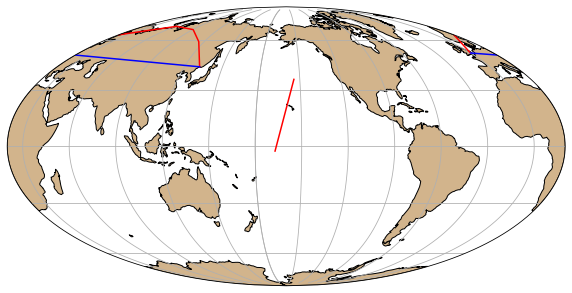

In [65]:
map_axis = ipmag.make_mollweide_map(central_longitude=200,figsize=(10,10))
plt.plot([-0.08, 132], [51.53, 43.17], color='red',  transform=ccrs.Geodetic())
plt.plot([-0.08, 132], [51.53, 43.17], color='blue', transform=ccrs.PlateCarree())
plt.plot([Laur_poles_A_plon[10],Laur_Greenland_poles_B_plon[8]], [Laur_poles_A_plat[10],Laur_Greenland_poles_B_plat[8]], color='red',  transform=ccrs.Geodetic())

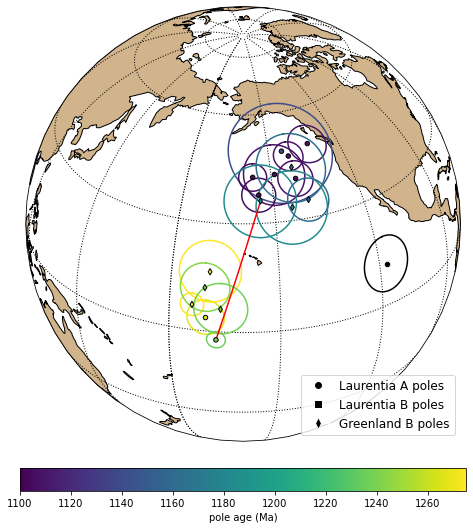

In [66]:
map_axis = ipmag.make_orthographic_map(central_longitude=200,central_latitude=30,figsize=(10,10))

ipmag.plot_poles_colorbar(map_axis,Laur_poles_A_plon[9:18],Laur_poles_A_plat[9:18],Laur_poles_A_a95[9:18],
                          Laur_poles_A_age[9:18],1100,1275,marker='o',colorbar=True,colormap='viridis')
# ipmag.plot_poles_colorbar(map_axis,Laur_poles_B_plon[4:5],Laur_poles_B_plat[4:5],Laur_poles_B_a95[4:5],
#                           Laur_poles_B_age[4:5],1100,1250,marker='s',colorbar=False,colormap='viridis')
ipmag.plot_poles_colorbar(map_axis,Laur_Greenland_poles_B_plon[4:],Laur_Greenland_poles_B_plat[4:],Laur_Greenland_poles_B_a95[4:],
                          Laur_Greenland_poles_B_age[4:],1100,1275,marker='d',colorbar=False,colormap='viridis')

plt.plot([Laur_poles_A_plon[10],Laur_Greenland_poles_B_plon[8]], [Laur_poles_A_plat[10],Laur_Greenland_poles_B_plat[8]], color='red',  transform=ccrs.Geodetic())

ipmag.plot_pole(map_axis,NC_1220_Laur_plon,NC_1220_Laur_plat,NC_1220_a95)
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Laurentia A poles',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='s', color='w', label='Laurentia B poles',
                          markerfacecolor='k', markersize=8),
                  Line2D([0], [0], marker='d', color='w', label='Greenland B poles',
                          markerfacecolor='k', markersize=8)]

plt.legend(handles=legend_elements, loc='lower right', fancybox=True, fontsize = 12)
plt.show()

# Plotting timeline of positive baked contact tests

In [67]:
all_Leirubakki_poles = pd.read_excel('../Data/Leirubakki-ALL.xlsx')
all_Leirubakki_poles_no_Laurentia = all_Leirubakki_poles.drop(all_Leirubakki_poles.index[166:267])

In [68]:
Leirubakki_poles['baked_contact_test'] = np.zeros(len(Leirubakki_poles))

positive_baked_contact_test = 'C+'
positive_inverse_baked_contact_test = 'C*+'

for n in Leirubakki_poles.index:
    test_string = str(Leirubakki_poles['TESTS'][n])
    string_position = test_string.find(positive_baked_contact_test)
    if string_position != -1:
        Leirubakki_poles['baked_contact_test'][n] = 1
        
all_Leirubakki_poles_no_Laurentia['baked_contact_test'] = np.zeros(len(all_Leirubakki_poles_no_Laurentia))

for n in all_Leirubakki_poles_no_Laurentia.index:
    test_string = str(all_Leirubakki_poles_no_Laurentia['TESTS'][n])
    string_position = test_string.find(positive_baked_contact_test)
    if string_position != -1:
        all_Leirubakki_poles_no_Laurentia['baked_contact_test'][n] = 1
        

positive_baked_laurentia = Leirubakki_poles[Leirubakki_poles['baked_contact_test'] == 1]
positive_baked_other = all_Leirubakki_poles_no_Laurentia[all_Leirubakki_poles_no_Laurentia['baked_contact_test'] == 1]

In [69]:
positive_other_yvalues = np.ones(len(positive_baked_other))*1.05
positive_Laurentia_yvalues = np.ones(len(positive_baked_laurentia))
all_Laurentia_yvalues = np.ones(len(Leirubakki_poles))

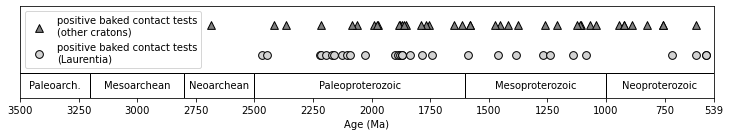

In [70]:
plt.figure(figsize=(10.25,2))
plt.scatter(positive_baked_other['nominal age'],positive_other_yvalues,edgecolor='black',s=60,marker='^', facecolor='grey', label='positive baked contact tests\n(other cratons)')
plt.scatter(positive_baked_laurentia['nominal age'],positive_Laurentia_yvalues,edgecolor='black',s=60, facecolor='lightgrey',label='positive baked contact tests\n(Laurentia)')
ax = plt.gca()
ax.axes.get_yaxis().set_visible(False)
ax.axes.set_xticks([539, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 3250, 3500])
#ax.tick_params(axis='x', colors='white')
plt.xlim(3500,539)
plt.ylim(0.93,1.08)
plt.xlabel('Age (Ma)')
#plt.setp(ax.get_xticklabels(), fontsize=16, color='white')
plt.legend()

for era in timescale.index[1:-1]:  
    start = timescale['b_age'][era]
    end = timescale['t_age'][era]
    rect = plt.Rectangle((end,0.93), start-end, 0.04, facecolor='white',edgecolor='black',linestyle='-')
    ax.add_patch(rect)
    if timescale['abbr'][era] == 'Paleoarch.':
        start = 3500
        name = timescale['abbr'][era]
        plt.text((start+end)/2,0.95,name,
         verticalalignment='center',horizontalalignment='center')
    else: 
        name = timescale['era'][era]
        plt.text((start+end)/2,0.95,name,
                 verticalalignment='center',horizontalalignment='center')
plt.tight_layout()
plt.savefig('../Figures/baked_contact_timeline_all.pdf')

# plt.figure(figsize=(10,1.5))
# plt.scatter(positive_baked_laurentia['nominal age'],positive_Laurentia_yvalues,edgecolor='black',s=60, facecolor='C1')
# ax = plt.gca()
# ax.axes.get_yaxis().set_visible(False)
# ax.axes.set_xticks([539, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000])
# ax.tick_params(axis='x', colors='white')
# plt.xlim(3000,539)
# plt.ylim(0.97,1.08)
# plt.setp(ax.get_xticklabels(), fontsize=16, color='white')
# plt.tight_layout()
# plt.savefig('../Figures/baked_contact_timeline_Laurentia.pdf')

# plt.figure(figsize=(10,1.5))
# plt.scatter(Leirubakki_poles['nominal age'],all_Laurentia_yvalues,edgecolor='black',s=60, facecolor='C1')
# ax = plt.gca()
# ax.axes.get_yaxis().set_visible(False)
# ax.axes.set_xticks([539, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000])
# ax.tick_params(axis='x', colors='white')
# plt.xlim(3000,539)
# plt.ylim(0.97,1.08)
# plt.setp(ax.get_xticklabels(), fontsize=16, color='white')
# plt.tight_layout()
# plt.savefig('../Figures/timeline_Laurentia.pdf')

# Calculating the age difference between dated Grenville dikes

In [71]:
def age_diff(date1,date1_2sigma,date1_label,date2,date2_2sigma,date2_label,nMC=1000000,date_axis_length=1.2):
    
    diff = date1 - date2
    diff_uncertainty = np.sqrt(date1_2sigma**2 + date2_2sigma**2)
    print('difference between ' + str(date1_label) + ' and ' + str(date2_label) + ' = ' + str(np.round(diff,decimals=3)))
    print('linearly propagated 2σ uncertainty of the difference = ' + str(np.round(diff_uncertainty,decimals=3)))

    date1_mc = np.random.normal(date1,date1_2sigma/2,nMC)
    date2_mc = np.random.normal(date2,date2_2sigma/2,nMC)
    diff_mc = date1_mc-date2_mc
    diff_median = np.median(diff_mc)
    diff_percent97_5 = np.percentile(diff_mc,97.5)
    diff_percent2_5 = np.percentile(diff_mc,2.5)
    
    print('\n97.5 percentile of difference in Monte Carlo simulations = ' + str(np.round(diff_percent97_5,decimals=3)))
    print('2.5 percentile of difference in Monte Carlo simulations = ' + str(np.round(diff_percent2_5,decimals=3)))
    
    ax1 = plt.subplot(2,1,1)
    ax1.hist(date1_mc, histtype='step',bins=100,label=date1_label)
    ax1.hist(date2_mc, histtype='step',bins=100,label=date2_label)
    ax1.set_xlabel('age (Ma)')
    ax1.set_xlim((date1+date2)/2 + date_axis_length/2, (date1+date2)/2 - date_axis_length/2)
    ax1.legend()
    
    ax2 = plt.subplot(2,1,2)
    n_diff, x_diff, diff_hist = ax2.hist(diff_mc,bins=100,color='C3',label='duration')
    ax2.vlines(diff_median,0,np.max(n_diff)*1.1,color='black')
    ax2.vlines(diff_percent97_5,0,np.max(n_diff)*1.1,color='black',linestyle='--')
    ax2.vlines(diff_percent2_5,0,np.max(n_diff)*1.1,color='black',linestyle='--')
    ax2.set_xlabel('age difference (Ma)')
    ax2.set_xlim(diff_median - date_axis_length/2, diff_median + date_axis_length/2)
    ax2.set_ylim(0,np.max(n_diff)*1.1)
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

difference between direction b Grenville dike and direction c Grenville dike = 2.5
linearly propagated 2σ uncertainty of the difference = 0.922

97.5 percentile of difference in Monte Carlo simulations = 3.405
2.5 percentile of difference in Monte Carlo simulations = 1.599


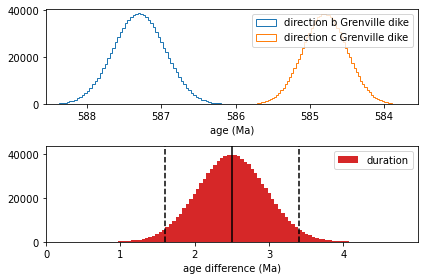

In [72]:
age_diff(587.3,0.7,'direction b Grenville dike',584.8,0.6,'direction c Grenville dike',date_axis_length=5)

# List of A poles

|pole| CRATON                   | ROCKNAME                                            | GPMDB-result#   |   SLAT |   SLONG |   PLAT |   PLONG |      A95 |   1 |   2 |   3 | 4   |   5 |   6 |   7 |   Q(7) |   nominal age |   min |   max | POLE AUTHORS                                | YEAR   | Nordic_Grade   |
|---:|:-------------------------|:----------------------------------------------------|:----------------|-------:|--------:|-------:|--------:|---------:|----:|----:|----:|:----|----:|----:|----:|-------:|--------------:|------:|------:|:--------------------------------------------|:-------|:---------------|
|  0 | Laurentia                | Franklin LIP grand mean                             | MEAN            |  73    |  275.4  |    6.7 |   162.1 |  3       |   1 |   1 |   1 | C   |   1 |   1 |   0 |      6 |         724   |   721 |   727 | Denyszyn et al.                             | 2009   | A              |
|  1 | Laurentia                | Michipicoten Island Fm                              | NEW             |  47.7  |  274.3  |   17   |   174.7 |  4.4     |   1 |   1 |   1 | 0   |   1 |   0 |   0 |      4 |        1084   |  1083 |  1085 | Fairchild et al.                            | 2017   | A              |
|  2 | Laurentia                | Lake Shore Traps                                    | 9506            |  47.6  |  271.9  |   23.1 |   186.4 |  4       |   1 |   1 |   1 | C   |   1 |   0 |   1 |      6 |        1087   |  1085 |  1089 | Kulakov et al.                              | 2013   | A              |
|  3 | Laurentia                | Central Arizona diabases -N                         | NEW             |  33.7  |  249.2  |   15.7 |   175.3 |  7.00999 |   1 |   1 |   1 | 0   |   1 |   0 |   1 |      5 |        1088   |  1077 |  1099 | Donadini et al.                             | 2011   | A              |
|  4 | Laurentia                | Schroeder Lutsen Basalts                            | NEW             |  47.5  |  269.1  |   27.1 |   187.8 |  3       |   1 |   1 |   1 | 0   |   1 |   0 |   1 |      5 |        1090   |  1083 |  1092 | Fairchild et al.                            | 2017   | A              |
|  5 | Laurentia                | Portage Lake Volcanics                              | 9507            |  47    |  271.2  |   26.7 |   178   |  4.69574 |   1 |   1 |   1 | fG  |   1 |   0 |   1 |      6 |        1095   |  1092 |  1098 | Hnat et al.                                 | 2006   | A              |
|  6 | Laurentia                | North Shore lavas -N                                | NEW             |  46.3  |  268.7  |   34.5 |   181.3 |  2.8     |   1 |   1 |   1 | 0   |   1 |   1 |   1 |      6 |        1097   |  1094 |  1100 | Tauxe & Kodama                              | 2009   | A              |
|  7 | Laurentia                | Uppermost Mamainse Point volcanics -N               | NEW             |  47.1  |  275.3  |   31.2 |   183.2 |  2.5     |   1 |   1 |   1 | G   |   1 |   1 |   1 |      7 |        1098   |  1095 |  1101 | Swanson-Hysell et al.                       | 2014a  | A              |
|  8 | Laurentia                | Mamainse Point volcanics (lower N, upper R)         | 9512            |  47.1  |  275.3  |   36.1 |   189.7 |  4.9     |   1 |   1 |   1 | G   |   1 |   1 |   1 |      7 |        1100.5 |  1100 |  1101 | Swanson-Hysell et al.                       | 2014a  | A              |
|  9 | Laurentia                | Lower Mamainse Point volcanics -R2                  | 9511            |  47.1  |  275.3  |   37.5 |   205.2 |  4.5     |   1 |   1 |   1 | G   |   1 |   1 |   1 |      7 |        1105   |  1103 |  1107 | Swanson-Hysell et al.                       | 2014a  | A              |
| 10 | Laurentia                | Upper Osler volcanics -R                            | 9514            |  48.7  |  272.4  |   42.5 |   201.6 |  3.7     |   1 |   1 |   1 | f   |   1 |   1 |   1 |      7 |        1105   |  1103 |  1107 | Swanson-Hysell et al.                       | 2014b  | A              |
| 11 | Laurentia                | Middle Osler volcanics -R                           | NEW             |  48.8  |  272.4  |   42.7 |   211.3 |  8.2     |   1 |   1 |   1 | 0   |   1 |   1 |   1 |      6 |        1106.5 |  1103 |  1110 | Swanson-Hysell et al.                       | 2014b  | A              |
| 12 | Laurentia                | Lowermost Mamainse Point volcanics -R1              | 9510            |  47.1  |  275.3  |   49.5 |   227   |  5.3     |   1 |   1 |   1 | G   |   1 |   1 |   1 |      7 |        1108   |  1105 |  1111 | Swanson-Hysell et al.                       | 2014a  | A              |
| 13 | Laurentia                | Lower Osler volcanics -R                            | 9515            |  48.8  |  272.3  |   40.9 |   218.6 |  4.8     |   1 |   1 |   1 | 0   |   1 |   1 |   1 |      6 |        1108   |  1105 |  1111 | Swanson-Hysell et al.                       | 2014b  | A              |
| 14 | Laurentia                | MEAN Nipigon sills and lavas                        | MEAN            |  49.1  |  270.9  |   47.2 |   217.8 |  4       |   1 |   1 |   1 | c   |   1 |   0 |   1 |      6 |        1111   |  1107 |  1115 | LULEÅ WORKING GROUP                         | 2009   | A              |
| 15 | Laurentia                | Abitibi Dykes                                       | 7193            |  48    |  279    |   48.8 |   215.5 | 14.1     |   1 |   1 |   1 | C   |   1 |   1 |   1 |      7 |        1141   |  1139 |  1143 | Ernst & Buchan                              | 1993   | A              |
| 16 | Laurentia                | Sudbury Dykes Combined                              | 2175            |  46.3  |  278.6  |   -2.5 |   192.8 |  2.5     |   1 |   1 |   1 | C   |   1 |   0 |   1 |      6 |        1237   |  1232 |  1242 | Palmer et al. (age: Dudás et al. 1994)      | 1977   | A              |
| 17 | Laurentia                | Mackenzie dykes grand mean                          | MEAN            |  65    |  250    |    4   |   190   |  5       |   1 |   1 |   1 | C   |   1 |   0 |   1 |      6 |        1267   |  1265 |  1269 | Buchan et al.                               | 2000   | A              |
| 18 | Laurentia                | Pilcher, Garnet Range and Libby Fms                 | 9030            |  46.7  |  246.4  |  -19.2 |   215.3 |  7.7     |   1 |   1 |   1 | f   |   1 |   0 |   1 |      6 |        1384.5 |  1362 |  1407 | Elston et al.                               | 2002   | A              |
| 19 | Laurentia                | McNamara Formation                                  | 9031            |  46.9  |  246.4  |  -13.5 |   208.3 |  6.7     |   1 |   1 |   1 | f   |   1 |   1 |   1 |      7 |        1401   |  1395 |  1407 | Elston et al.                               | 2002   | A              |
| 20 | Laurentia                | Purcell Lava                                        | 9037            |  49.4  |  245.1  |  -23.6 |   215.6 |  4.8     |   1 |   1 |   1 | f   |   1 |   0 |   0 |      5 |        1443   |  1436 |  1450 | Elston et al.                               | 2002   | A              |
| 21 | Laurentia                | Snowslip Formation                                  | 9038            |  47.9  |  245.9  |  -24.9 |   210.2 |  3.5     |   1 |   1 |   1 | f   |   1 |   1 |   1 |      7 |        1449.5 |  1436 |  1463 | Elston et al.                               | 2002   | A              |
| 22 | Laurentia                | Spokane Formation                                   | 9039            |  48.2  |  246.8  |  -24.8 |   215.5 |  4.7     |   1 |   1 |   1 | f   |   1 |   0 |   1 |      6 |        1457.5 |  1445 |  1470 | Elston et al.                               | 2002   | A              |
| 23 | Laurentia                | Michikamau Intrusion Combined                       | 2274            |  54.5  |  296    |   -1.5 |   217.5 |  4.6669  |   1 |   1 |   1 | C   |   1 |   1 |   1 |      7 |        1460   |  1455 |  1465 | Emslie et al.                               | 1976   | A              |
| 24 | Laurentia                | St.Francois Mountains Acidic Rocks                  | 8932            |  37.5  |  269.5  |  -13.2 |   219   |  6.13188 |   1 |   1 |   1 | cfg |   1 |   0 |   1 |      6 |        1476   |  1460 |  1492 | Meert & Stuckey                             | 2002   | A              |
| 25 | Laurentia                | Western Channel Diabase                             | 2669            |  66.4  |  242.2  |    9   |   245   |  6.62269 |   1 |   1 |   0 | C   |   1 |   0 |   1 |      5 |        1590   |  1587 |  1593 | Irving et al. (age: Hamilton & Buchan 2010) | 1972   | A              |
| 26 | Laurentia                | Cleaver dykes                                       | 9139            |  67.5  |  241.97 |   19.4 |   276.7 |  6.1     |   1 |   1 |   1 | Cc  |   1 |   0 |   1 |      6 |        1740   |  1736 |  1745 | Irving et al.                               | 2004   | A              |
| 27 | Laurentia-Greenland      | South Qoroq Intrusion                               | 6610            |  61.15 |  314.6  |   41.8 |   215.9 | 13.1042  |   1 |   1 |   1 | C   |   0 |   0 |   1 |      5 |        1163   |  1161 |  1165 | Piper                                       | 1992   | A              |
| 28 | Laurentia-Rae            | Martin Fm                                           | 2659            |  59.6  |  251.4  |   -9   |   288   |  8.51176 |   1 |   1 |   0 | f   |   1 |   1 |   0 |      5 |        1818   |  1814 |  1822 | Evans & Bingham (age: Morelli et al. 2009)  | 1973   | A              |
| 29 | Laurentia-Slave          | MEAN Pearson A/Peninsular sill/Kilohigok basin sill | MEAN            |  65    |  250    |  -22   |   269   |  6       |   1 |   1 |   0 | C   |   1 |   1 |   1 |      6 |        1870   |  1866 |  1874 | Mitchell et al.                             | 2010   | A              |
| 30 | Laurentia-Slave          | Ghost dikes                                         | 9485            |  62.6  |  244.6  |    2   |   254   |  6       |   1 |   1 |   1 | C   |   1 |   1 |   0 |      6 |        1887   |  1878 |  1892 | Buchan et al.                               | 2016   | A              |
| 31 | Laurentia-Slave          | Lac de Gras dykes                                   | 9404            |  64.4  |  249.6  |   11.8 |   267.9 |  7.0993  |   1 |   1 |   1 | Cc  |   1 |   0 |   1 |      6 |        2026   |  2021 |  2031 | Buchan et al.                               | 2009   | A              |
| 32 | Laurentia-Slave          | Indin dykes                                         | 9484            |  62.5  |  245.6  |   36   |   284   |  7       |   1 |   1 |   1 | C   |   1 |   1 |   1 |      7 |        2126   |  2108 |  2129 | Buchan et al.                               | 2016   | A              |
| 33 | Laurentia-Slave          | Dogrib dykes                                        | 9406            |  62.5  |  245.5  |  -31   |   315   |  7       |   1 |   1 |   1 | C   |   1 |   0 |   1 |      6 |        2193   |  2191 |  2195 | Mitchell et al.                             | 2014   | A              |
| 34 | Laurentia-Slave          | Malley dykes                                        | 9405            |  64.2  |  249.8  |  -50.8 |   310   |  6.7     |   1 |   1 |   1 | c   |   1 |   0 |   0 |      5 |        2231   |  2229 |  2233 | Buchan et al.                               | 2012   | A              |
| 35 | Laurentia-Superior(East) | Minto dykes                                         | MEAN            |  57    |  285    |   38.7 |   171.5 | 13.1     |   1 |   1 |   1 | 0   |   1 |   1 |   0 |      5 |        1998   |  1996 |  2000 | Buchan et al. (recalc: Evans & Halls 2010)  | 1998   | A              |
| 36 | Laurentia-Superior(East) | Lac Esprit dykes                                    | MEAN            |  53    |  282    |   62   |   170.5 |  6.4     |   1 |   1 |   1 | 0   |   1 |   0 |   1 |      5 |        2069   |  2068 |  2070 | Buchan et al. (recalc: Evans & Halls 2010)  | 2007   | A              |
| 37 | Laurentia-Superior(East) | Biscotasing dykes                                   | MEAN            |  48    |  280    |   26   |   223.9 |  7       |   1 |   1 |   1 | C   |   1 |   0 |   1 |      6 |        2169.5 |  2167 |  2172 | Evans & Halls                               | 2010   | A              |
| 38 | Laurentia-Superior(East) | Nipissing N1 component                              | MEAN            |  47    |  279    |  -17   |   272   | 10       |   1 |   1 |   1 | C   |   1 |   1 |   1 |      7 |        2217   |  2213 |  2221 | Buchan et al.                               | 2000   | A              |
| 39 | Laurentia-Superior(East) | Senneterre dykes                                    | MEAN            |  49    |  283    |  -15.3 |   284.3 |  6       |   1 |   1 |   1 | C   |   1 |   1 |   1 |      7 |        2218   |  2212 |  2224 | Buchan et al.                               | 1993   | A              |
| 40 | Laurentia-Superior(East) | Matachewan dykes N                                  | MEAN            |  48    |  278    |  -52.3 |   239.5 |  2.4     |   1 |   1 |   1 | C   |   1 |   0 |   1 |      6 |        2446   |  2443 |  2449 | Evans & Halls                               | 2010   | A              |
| 41 | Laurentia-Superior(East) | Matachewan dykes R                                  | MEAN            |  48    |  278    |  -44.1 |   238.3 |  1.6     |   1 |   1 |   1 | C   |   1 |   0 |   1 |      6 |        2466   |  2443 |  2489 | Evans & Halls                               | 2010   | A              |
| 42 | Laurentia-Superior(West) | Molson dykes B+C2                                   | MEAN            |  55    |  262    |   28.9 |   218   |  3.8     |   1 |   1 |   1 | C   |   1 |   1 |   1 |      7 |        1878.5 |  1873 |  1884 | Halls & Heaman (recalc: Evans & Halls 2010) | 2000   | A              |
| 43 | Laurentia-Superior(West) | Fort Frances dykes                                  | MEAN            |  48    |  266    |   42.8 |   184.6 |  6.1     |   1 |   1 |   1 | 0   |   1 |   0 |   0 |      4 |        2076.5 |  2072 |  2081 | Halls (recalc: Evans & Halls 2010)          | 1986   | A              |
| 44 | Laurentia-Superior(West) | Cauchon Lake dykes                                  | MEAN            |  56    |  263    |   53.8 |   180.9 |  7.7     |   1 |   1 |   1 | C   |   1 |   0 |   0 |      5 |        2091   |  2089 |  2093 | Halls & Heaman (recalc: Evans & Halls 2010) | 2000   | A              |
| 45 | Laurentia-Superior(West) | Marathon dykes R                                    | MEAN            |  49    |  275    |   55.1 |   182.2 |  7.5     |   1 |   1 |   1 | C   |   1 |   0 |   0 |      5 |        2103.5 |  2101 |  2106 | Halls et al.                                | 2008   | A              |
| 46 | Laurentia-Superior(West) | Marathon dykes N                                    | MEAN            |  49    |  275    |   45.4 |   198.2 |  7.7     |   1 |   1 |   1 | 0   |   1 |   0 |   0 |      4 |        2123.5 |  2121 |  2126 | Halls et al.                                | 2008   | A              |
| 47 | Laurentia-Wyoming        | Sourdough dikes                                     | 9539            |  44.7  | -108.3  |   49.2 |   292   |  8.1     |   1 |   1 |   1 | C   |   1 |   1 |   0 |      6 |        1899   |  1894 |  1904 | Kilian et al.                               | 2016   | A              |
| 48 | Laurentia-Wyoming        | Rabbit Creek, Powder River, and South Path dikes    | 9496            |  43.9  |  252.8  |   65.5 |   339.2 |  7.6     |   1 |   1 |   1 | C   |   1 |   1 |   1 |      7 |        2160   |  2152 |  2171 | Kilian et al.                               | 2015   | A              |
| 49 | Laurentia-Wyoming        | Stillwater Complex - C2                             | NEW             |  45.2  |  249.2  |  -83.6 |   335.8 |  4.04231 |   1 |   1 |   1 | 0   |   1 |   0 |   0 |      4 |        2705   |  2701 |  2709 | Selkin et al.                               | 2008   | A              |